 # Première analyse des bases

## Importation des bibliothèques

In [1576]:
!pip install pandas

In [1497]:
!pip install statsmodels

In [1498]:
!pip install matplotlib

In [1499]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Définition du repertoire du travail

In [3]:
import os
os.getcwd()

'c:\\Users\\esthelle.kuissu\\OneDrive - Exiom Partners\\Documents\\Code_rapport_stage'

In [4]:
path = "c:\\Users\\esthelle.kuissu\\OneDrive - Exiom Partners\\Documents\\Code_rapport_stage\\Bases sinistres"

In [5]:
data = pd.read_csv(path + "\\bdd_sinistres_rapports_2024 - Copie.csv", sep=";", encoding="latin1")

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\952918729.py:1: DtypeWarning: Columns (33,49,73,86,104,107,150,151,152,153,154) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path + "\\bdd_sinistres_rapports_2024 - Copie.csv", sep=";", encoding="latin1")


In [6]:
data.head()

,cle_sin,date_evt,date_evt_decla,produit,objet,gar,cz,clos,sans_suite,corporel,...,MT_FORFAIT,MT_FORFAIT_ERD,LIB_CHOC,LIB_INTENS,GARAGE_AGREE_O_N,DPT_REP,_RESEAU_,NB_PIECE_REMPLACEE,NB_PIECE_REPAREE,age_soc
0,SC000006824,01/01/2024,02/01/2024,A,AVP,C,N,O,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
1,SC000008624,02/01/2024,02/01/2024,A,AVP,C,N,O,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
2,SC000011824,01/01/2024,02/01/2024,A,AVP,C,N,O,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
3,SC000015924,01/01/2024,02/01/2024,A,AVP,C,N,O,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
4,SC000016724,01/01/2024,02/01/2024,A,AVP,C,N,O,O,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0


In [7]:
data = data[(data["RE"] == "O") & (data["IN_REPAR_DECIS_MACIF"] == "O")]

In [8]:
data.head()

,cle_sin,date_evt,date_evt_decla,produit,objet,gar,cz,clos,sans_suite,corporel,...,MT_FORFAIT,MT_FORFAIT_ERD,LIB_CHOC,LIB_INTENS,GARAGE_AGREE_O_N,DPT_REP,_RESEAU_,NB_PIECE_REMPLACEE,NB_PIECE_REPAREE,age_soc
80448,241840204C A 001,02/01/2024,02/01/2024,A,AVP,C,N,O,N,N,...,32.5,NaN,Avant,Moyenne,N,44,Non agréé,3.0,NaN,NaN
80449,241840598C A 001,03/01/2024,03/01/2024,A,AVP,C,N,O,N,N,...,NaN,3.0,Autres,Legere,N,44,Non agréé,1.0,NaN,NaN
80451,241840842C A 006,03/01/2024,04/01/2024,A,AVP,C,N,O,N,N,...,NaN,NaN,Arriere,Moyenne,N,16,Indet,2.0,1.0,NaN
80452,241840544C A 002,03/01/2024,03/01/2024,A,AVP,C,N,O,N,N,...,NaN,NaN,Arriere,Legere,N,44,Indet,NaN,1.0,NaN
80453,241841770C A 003,08/01/2024,08/01/2024,A,AVP,C,N,O,N,N,...,NaN,NaN,Arriere,Moyenne,O,17,MRA,1.0,NaN,NaN


In [9]:
single_value_cols = [col for col in data.columns if data[col].nunique() == 1]

print("Colonnes avec une seule modalité :", single_value_cols)


Colonnes avec une seule modalité : ['produit', 'objet', 'gar', 'cz', 'corporel', 'nb_sin_obj', 'exercice', 'MT_AVANCE_RECOURS', 'MT_AVANCE_RECOURS_RECOURUS', 'RE', 'ANNEE_RAPPORT', 'NB_RE', 'IN_REPAR_DECIS_MACIF', 'NB_REP', 'MT_MO_REPARABLE_P3', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP']


In [10]:
data = data.drop(columns = ["produit", "objet", "gar", "cz", "corporel", "nb_sin_obj", 'MT_AVANCE_RECOURS', 'MT_AVANCE_RECOURS_RECOURUS', 'RE', 'ANNEE_RAPPORT', 'NB_RE', 'IN_REPAR_DECIS_MACIF', 'NB_REP', 'MT_MO_REPARABLE_P3'])

In [11]:
data = data.drop(columns = ["NB_IRREP"])


In [12]:
data = data.drop(columns = ["MT_MO_REPARABLE_T1", "MT_MO_REPARABLE_T2", "MT_MO_REPARABLE_T3", "MT_MO_REPARABLE_P1", "MT_MO_REPARABLE_P2", "MT_MO_REPARABLE_M1", "MT_MO_REPARABLE_M2", "MT_MO_REPARABLE_M3", "NBHH_MO_REPARABLE_T1", "NBHH_MO_REPARABLE_T2", "NBHH_MO_REPARABLE_T3", "NBHH_MO_REPARABLE_P1", "NBHH_MO_REPARABLE_P2", "NBHH_MO_REPARABLE_P3", "NBHH_MO_REPARABLE_M1", "NBHH_MO_REPARABLE_M2", "NBHH_MO_REPARABLE_M3", "MT_IP_REPARABLE_T1", "MT_IP_REPARABLE_T2", "MT_IP_REPARABLE_T3"])



In [13]:
print(list(data.columns))


['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'type_attest', 'orig_attest', 'relat_pers', 'aac', 'novice2', 'date_novice', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'valmini', 'valmaxi', 'prix', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'nature_soc', 'date_nais_soc', 'date_adh_soc', 'profess_soc', 'sexe_soc', 'sitfam_soc', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice', 'NO_EVEN', 'GARANTIE_HOST', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_C

In [2]:
columns_to_fill = ['RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP']
data[columns_to_fill] = data[columns_to_fill].fillna(0)


NameError: name 'data' is not defined

In [1]:
colonnes_vides = data.columns[data.isnull().all()]
print(colonnes_vides)

NameError: name 'data' is not defined

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183290 entries, 80448 to 278692
Columns: 123 entries, cle_sin to age_soc
dtypes: float64(57), int64(2), object(64)
memory usage: 173.4+ MB


In [17]:
pd.set_option('display.max_rows', None)
manquantes = data.isnull().sum()
print(manquantes[manquantes > 0].sort_values(ascending=False))

date_novice             177248
NBHH_IP_REPARABLE_T1    174202
NB_PIECES_REEMPLOI      158369
MT_PIECES_REEMPLOI      158369
NBHH_IP_REPARABLE_T3    155490
age_soc                 111443
MT_FORFAIT               82999
date_dernrempl           70882
MT_REMISE                66652
NBHH_IP_REPARABLE_T2     57671
MT_FORFAIT_ERD           51252
co2min                   29762
NB_PIECE_REPAREE         28738
NBHH_IP_REPARABLE        20870
MT_IP_REPARABLE          20833
NB_PIECE_REMPLACEE       19256
crash                    15640
MT_PIECES_REPARABLE       8246
cylin                     7920
TAUX_HORAIRE_MO           5821
NBHH_MO_REPARABLE         5821
MT_MO_REPARABLE           5768
date_nais_soc             3761
boncond                   2635
crm                       2635
date_nais                 1397
age                       1397
anc_permis                1378
date_permis               1378
num_sra                    241
prestige                   225
luxe                       225
date_pre

In [18]:
pd.set_option('display.max_rows', None)
manquantes_pc = (data.isnull().sum()/183290) * 100
print(manquantes_pc[manquantes_pc > 0].sort_values(ascending=False))

date_novice             96.703584
NBHH_IP_REPARABLE_T1    95.041737
NB_PIECES_REEMPLOI      86.403514
MT_PIECES_REEMPLOI      86.403514
NBHH_IP_REPARABLE_T3    84.832779
age_soc                 60.801462
MT_FORFAIT              45.282885
date_dernrempl          38.672050
MT_REMISE               36.364232
NBHH_IP_REPARABLE_T2    31.464346
MT_FORFAIT_ERD          27.962246
co2min                  16.237656
NB_PIECE_REPAREE        15.678979
NBHH_IP_REPARABLE       11.386328
MT_IP_REPARABLE         11.366141
NB_PIECE_REMPLACEE      10.505756
crash                    8.532926
MT_PIECES_REPARABLE      4.498882
cylin                    4.321021
TAUX_HORAIRE_MO          3.175842
NBHH_MO_REPARABLE        3.175842
MT_MO_REPARABLE          3.146926
date_nais_soc            2.051940
boncond                  1.437613
crm                      1.437613
date_nais                0.762180
age                      0.762180
anc_permis               0.751814
date_permis              0.751814
num_sra       

In [ ]:
data['date_dernrempl'] = data['date_dernrempl'].fillna(pd.to_datetime('2023-12-31'))
data['date_premsous'] = data['date_premsous'].fillna(pd.to_datetime('2023-12-31'))


In [20]:
# Filtrer les lignes où date_novice est NA
data_new = data[data["date_novice"].isna()]

# Calculer les pourcentages
pourcentages = data_new["novice2"].value_counts(normalize=True)* 100

# Afficher les résultats
print(pourcentages.round())


novice2
~    100.0
0      0.0
2      0.0
1      0.0
3      0.0
Name: proportion, dtype: float64


In [21]:
# Remplacement de toutes les valeurs tilde (~) par NaN
data.replace('~', np.nan, inplace=True)


In [22]:
filtered_df = data[data['date_nais_soc'].isna()][['age_soc']]
print(filtered_df)


        age_soc
80678       NaN
80719       NaN
80729       NaN
80758       NaN
80784       NaN
80797       NaN
81302       NaN
81369       NaN
81483       NaN
81507       NaN
81766       NaN
81771       NaN
81823       NaN
81824       NaN
81889       NaN
82051       NaN
82073       NaN
82162       NaN
82218       NaN
82325       NaN
82375       NaN
82418       NaN
82467       NaN
82628       NaN
82747       NaN
83037       NaN
83153       NaN
83216       NaN
83308       NaN
83386       NaN
83543       NaN
83568       NaN
83576       NaN
83800       NaN
83890       NaN
83991       NaN
83996       NaN
84030       NaN
84170       NaN
84407       NaN
84628       NaN
84782       NaN
84801       NaN
84827       NaN
84831       NaN
84916       NaN
84924       NaN
84949       NaN
85011       NaN
85045       NaN
85052       NaN
85185       NaN
85197       NaN
85216       NaN
85231       NaN
85242       NaN
85345       NaN
85387       NaN
85431       NaN
85625       NaN
85662       NaN
85682   

In [23]:
data = data.drop(columns = ["date_novice", "novice2", "relat_pers", "age_soc"])

In [24]:
# Remplacer les valeurs manquantes par 0 pour les colonnes spécifiées
columns_to_fill = ["NBHH_IP_REPARABLE_T1", 'MT_PIECES_REEMPLOI', 'NB_PIECES_REEMPLOI',
    'NBHH_IP_REPARABLE_T3', 'MT_FORFAIT', 'MT_REMISE', 'NBHH_IP_REPARABLE_T2',
    'MT_FORFAIT_ERD']

# Remplacer les valeurs manquantes par 0 uniquement dans les colonnes spécifiées
data[columns_to_fill] = data[columns_to_fill].fillna(0)

# Supprimer la colonne NO_EVEN
data.drop(columns=["NO_EVEN"], inplace=True, errors='ignore')





In [25]:
# Supprimer toutes les colonnes qui finissent par '_soc', sauf 'frac_paiement_soc'
data = data.drop(columns=[col for col in data.columns if col.endswith('_soc') and col != 'fract_paiem_soc'], errors='ignore')


In [26]:
print('fract_paiem_soc' in data.columns)


True


In [ ]:
data.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,MT_REMISE,MT_FORFAIT,MT_FORFAIT_ERD,LIB_CHOC,LIB_INTENS,GARAGE_AGREE_O_N,DPT_REP,_RESEAU_,NB_PIECE_REMPLACEE,NB_PIECE_REPAREE
80448,241840204C A 001,02/01/2024,02/01/2024,O,N,4,30/01/1991,30/04/2020,PRO,N,...,30.43,32.5,0.0,Avant,Moyenne,N,44,Non agréé,3.0,NaN
80449,241840598C A 001,03/01/2024,03/01/2024,O,N,4,02/04/1992,12/06/2020,PRO,N,...,0.00,0.0,3.0,Autres,Legere,N,44,Non agréé,1.0,NaN
80451,241840842C A 006,03/01/2024,04/01/2024,O,N,2,03/10/2019,2023-12-31 00:00:00,PRO,N,...,0.00,0.0,0.0,Arriere,Moyenne,N,16,Indet,2.0,1.0
80452,241840544C A 002,03/01/2024,03/01/2024,O,N,4,07/04/2017,2023-12-31 00:00:00,PRO,N,...,0.00,0.0,0.0,Arriere,Legere,N,44,Indet,NaN,1.0
80453,241841770C A 003,08/01/2024,08/01/2024,O,N,4,14/12/1987,17/04/2014,EXC,N,...,0.00,0.0,0.0,Arriere,Moyenne,O,17,MRA,1.0,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183290 entries, 80448 to 278692
Columns: 112 entries, cle_sin to NB_PIECE_REPAREE
dtypes: float64(56), int64(2), object(54)
memory usage: 158.0+ MB


In [30]:
pd.set_option('display.max_rows', None)
manquantes_pc = (data.isnull().sum()/183290) * 100
print(manquantes_pc[manquantes_pc > 0].sort_values(ascending=False))

co2min                 16.237656
NB_PIECE_REPAREE       15.678979
NBHH_IP_REPARABLE      11.386328
MT_IP_REPARABLE        11.366141
NB_PIECE_REMPLACEE     10.505756
crash                   8.532926
MT_PIECES_REPARABLE     4.498882
cylin                   4.321021
NBHH_MO_REPARABLE       3.175842
TAUX_HORAIRE_MO         3.175842
MT_MO_REPARABLE         3.146926
boncond                 1.437613
crm                     1.437613
petit_rouleur           1.395603
LIB_INTENS              1.057886
date_nais               0.762180
age                     0.762180
date_permis             0.751814
anc_permis              0.751814
type_attest             0.751268
orig_attest             0.750723
profess                 0.488297
sexe                    0.422282
sitfam                  0.422282
aac                     0.410824
formule_gar             0.228054
elt_secu                0.217142
num_sra                 0.173496
prestige                0.171859
luxe                    0.171859
DPT_REP   

In [31]:
filtered = data[data['val'].isna()][['valmaxi', 'valmini', 'prix', 'cdval']]
print(filtered)

        valmaxi  valmini  prix cdval
80784       NaN      NaN   NaN   NaN
81483       NaN      NaN   NaN   NaN
82218       NaN      NaN   NaN   NaN
84924       NaN      NaN   NaN   NaN
84949       NaN      NaN   NaN   NaN
85045       NaN      NaN   NaN   NaN
85431       NaN      NaN   NaN   NaN
85662       NaN      NaN   NaN   NaN
88738       NaN      NaN   NaN   NaN
88780       NaN      NaN   NaN   NaN
89331       NaN      NaN   NaN   NaN
90801       NaN      NaN   NaN   NaN
90959       NaN      NaN   NaN   NaN
92798       NaN      NaN   NaN   NaN
92988       NaN      NaN   NaN   NaN
95896       NaN      NaN   NaN   NaN
97738       NaN      NaN   NaN   NaN
98069       NaN      NaN   NaN   NaN
98528       NaN      NaN   NaN   NaN
100868      NaN      NaN   NaN   NaN
101534      NaN      NaN   NaN   NaN
102843      NaN      NaN   NaN   NaN
106099      NaN      NaN   NaN   NaN
114853      NaN      NaN   NaN   NaN
117312      NaN      NaN   NaN   NaN
118271      NaN      NaN   NaN   NaN
1

In [ ]:
data = data.drop(columns = ['valmaxi', 'valmini', 'prix'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183290 entries, 80448 to 278692
Columns: 109 entries, cle_sin to NB_PIECE_REPAREE
dtypes: float64(53), int64(2), object(54)
memory usage: 153.8+ MB


In [34]:
data = data.drop(columns = ['date_nais', 'date_permis', 'date_sortie_veh', 'type_attest'])

In [35]:
pd.set_option('display.max_rows', None)
manquantes_pc = (data.isnull().sum()/183290) * 100
print(manquantes_pc[manquantes_pc > 0].sort_values(ascending=False))

co2min                 16.237656
NB_PIECE_REPAREE       15.678979
NBHH_IP_REPARABLE      11.386328
MT_IP_REPARABLE        11.366141
NB_PIECE_REMPLACEE     10.505756
crash                   8.532926
MT_PIECES_REPARABLE     4.498882
cylin                   4.321021
NBHH_MO_REPARABLE       3.175842
TAUX_HORAIRE_MO         3.175842
MT_MO_REPARABLE         3.146926
crm                     1.437613
boncond                 1.437613
petit_rouleur           1.395603
LIB_INTENS              1.057886
age                     0.762180
anc_permis              0.751814
orig_attest             0.750723
profess                 0.488297
sexe                    0.422282
sitfam                  0.422282
aac                     0.410824
formule_gar             0.228054
elt_secu                0.217142
num_sra                 0.173496
prestige                0.171859
luxe                    0.171859
DPT_REP                 0.098205
rachat_francBG          0.053467
pvid                    0.050739
poidspuiss

In [36]:
print(manquantes_pc[manquantes_pc == 0])

cle_sin                           0.0
date_evt                          0.0
date_evt_decla                    0.0
clos                              0.0
sans_suite                        0.0
quart_resp                        0.0
date_premsous                     0.0
date_dernrempl                    0.0
systeme                           0.0
exercice                          0.0
GARANTIE_HOST                     0.0
MT_FRANCHISE                      0.0
MT_CHARGE_BRUTE                   0.0
MT_CHARGE_NETTE                   0.0
MT_REGLEMENT_SIN                  0.0
MT_REGLEMENT_COM                  0.0
MT_ABANDON_RECOURS                0.0
MT_FRAIS_HONO                     0.0
MT_PROVISIONS                     0.0
MT_RECOURS_TOTAL                  0.0
MT_ESTIMATION_RECOURS_RESTANTS    0.0
MT_PAIEMENTS                      0.0
MT_CHARGE_BRUTE_ECO               0.0
MT_CHARGE_NETTE_ECO               0.0
ZN_NO_RAPPORT_EXPTIS              0.0
MT_VAL_REMPL_VEH_TTC              0.0
MT_TOTAL_REP

In [37]:
data['marq'].fillna(data['marq'].mode()[0], inplace=True)
data['modele2'].fillna(data['modele2'].mode()[0], inplace=True)
data['cdval'].fillna(data['cdval'].mode()[0], inplace=True)


C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\1044086210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['marq'].fillna(data['marq'].mode()[0], inplace=True)
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\1044086210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [38]:
data['generation'].fillna(data['generation'].mode()[0], inplace=True)


C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\2463878947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['generation'].fillna(data['generation'].mode()[0], inplace=True)


In [39]:

data[['profess', 'sexe', 'sitfam']] = data[['profess', 'sexe', 'sitfam']].fillna("I")


In [40]:
pd.set_option('display.max_rows', None)
manquantes_pc = (data.isnull().sum()/183290) * 100
print(manquantes_pc[manquantes_pc > 0].sort_values(ascending=False))

co2min                 16.237656
NB_PIECE_REPAREE       15.678979
NBHH_IP_REPARABLE      11.386328
MT_IP_REPARABLE        11.366141
NB_PIECE_REMPLACEE     10.505756
crash                   8.532926
MT_PIECES_REPARABLE     4.498882
cylin                   4.321021
NBHH_MO_REPARABLE       3.175842
TAUX_HORAIRE_MO         3.175842
MT_MO_REPARABLE         3.146926
boncond                 1.437613
crm                     1.437613
petit_rouleur           1.395603
LIB_INTENS              1.057886
age                     0.762180
anc_permis              0.751814
orig_attest             0.750723
aac                     0.410824
formule_gar             0.228054
elt_secu                0.217142
num_sra                 0.173496
prestige                0.171859
luxe                    0.171859
DPT_REP                 0.098205
rachat_francBG          0.053467
poidspuiss              0.050739
pvid                    0.050739
pickup                  0.050194
trans                   0.050194
frein     

In [41]:
# Déterminer les variables qualitatives et quantitatives
quali_vars = data.select_dtypes(include=['object']).columns.tolist()
quanti_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables qualitatives :", quali_vars)
print("Variables quantitatives :", quanti_vars)

Variables qualitatives : ['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'DPT_REP', '_RESEAU_']
Variables quantitatives : ['quart_resp', 'age', 'anc_permis', 'age_veh', 'generation', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'val', 'couple', 'airbag', 'crash', 'co2min', 'crm', 'boncond', 'nab50', 'exercice', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE', 'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_

In [42]:
# Recodage de la variable quart_resp
quart_resp_mapping = {0: 'Non_resp', 1: 'resp_25pc', 2: 'resp_50pc', 4: 'resp_75pc', 5: 'resp_100pc'}
data['quart_resp'] = data['quart_resp'].replace(quart_resp_mapping)

# Recodage de la variable crash
crash_mapping = {1: 't_faible', 2: 'faible', 3: 'moyen', 4: 'bon', 5: 't_bon', 6: 'exc'}
data['crash'] = data['crash'].replace(crash_mapping)

print(data[['quart_resp', 'crash']].head())  # Vérification du résultat


      quart_resp  crash
80448  resp_75pc    bon
80449  resp_75pc  t_bon
80451  resp_50pc    NaN
80452  resp_75pc    bon
80453  resp_75pc  t_bon


In [43]:
# Déterminer les variables qualitatives et quantitatives
quali_vars = data.select_dtypes(include=['object']).columns.tolist()
quanti_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables qualitatives :", quali_vars)
print("Variables quantitatives :", quanti_vars)

Variables qualitatives : ['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'crash', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'DPT_REP', '_RESEAU_']
Variables quantitatives : ['age', 'anc_permis', 'age_veh', 'generation', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'val', 'couple', 'airbag', 'co2min', 'crm', 'boncond', 'nab50', 'exercice', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE', 'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_

In [44]:
quanti_vars = [col for col in quanti_vars if col != 'exercice']


In [45]:
quanti_vars = [col for col in quanti_vars if col not in ['NBHH_IP_REPARABLE_T1', 'NBHH_IP_REPARABLE_T2', 'NBHH_IP_REPARABLE_T3', 'MT_MO_REPARABLE', 'MT_IP_REPARABLE', 'MT_PIECES_REPARABLE', 'MT_TOTAL_REPARABLE']]


In [46]:
#Imputation de age_veh
data['age_veh'] = data.groupby(['modele2', 'marq', 'generation', 'cdval'])['age_veh'].transform(lambda x: x.fillna(x.median()))


In [47]:
missing_values = data[['modele2', 'marq', 'generation', 'cdval', 'age_veh']].isna().sum()
print(missing_values)


modele2       0
marq          0
generation    0
cdval         0
age_veh       0
dtype: int64


In [48]:
variables_voiture = ['co2min', 'crash', 'cylin', 'boncond', 'poidspuiss', 'pvid', 'val', 'airbag',
                     'couple', 'caros', 'energ', 'modele_desc', 'cond_indet', 'segment', 'boite',
                     'suspe', 'pfisc', 'pdyne', 'sport', 'vites', 'pkw', 'vu', 'pickup', 'alim',
                     'trans', 'frein', 'garag', 'usage2', 'petit_rouleur', 'LIB_INTENS', 'luxe', 'prestige']
variables_personne = ['crm', 'age', 'anc_permis', 'orig_attest',
                      'aac',  'num_sra', 'DPT_REP', 'soumis_crm', 'nab50']
variables_contrat= ['formule_gar', 'elt_secu','date_premsous', 'rachat_francBG', 'franch', 'formule_ratt',
                      'bureau_ratt','fract_paiem_soc', 'NBHH_IP_REPARABLE', 'MT_IP_REPARABLE', 'MT_MO_REPARABLE','NB_PIECE_REPAREE', 'NB_PIECE_REMPLACEE',
    'MT_PIECES_REPARABLE', 'TAUX_HORAIRE_MO', "NBHH_MO_REPARABLE", 'NB_PIECES_REEMPLOI']

In [49]:

# Fonction optimisée pour remplacer les valeurs manquantes
def impute_missing_values(df, variables, group_vars):
    for var in variables:
        if var in df.columns:  # Vérifier si la colonne existe
            if df[var].dtype == 'object':  # Si qualitative, remplacer par le mode
                mode_value = df.groupby(group_vars, dropna=False)[var].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df[var].dropna().mode()[0]))
                df[var] = df[var].combine_first(mode_value)  # Alignement correct des valeurs imputées

            elif df[var].dtype in ['int64', 'float64']:  # Si quantitative, remplacer par la médiane
                median_value = df.groupby(group_vars, dropna=False)[var].transform(lambda x: x.fillna(x.median() if not x.isnull().all() else df[var].dropna().median()))
                df[var] = df[var].combine_first(median_value)  # Alignement correct des valeurs imputées

    return df

# Définir les variables de regroupement
grouping_vars = ['modele2', 'marq', 'generation', 'cdval', 'age_veh']

# Appliquer le remplacement des valeurs manquantes
data = impute_missing_values(data, variables_voiture, grouping_vars)
data = impute_missing_values(data, variables_personne, grouping_vars)
data = impute_missing_values(data, variables_contrat, grouping_vars)


C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\4180080226.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mode_value = df.groupby(group_vars, dropna=False)[var].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df[var].dropna().mode()[0]))
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\4180080226.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mode_value = df.groupby(group_vars, dropna=False)[var].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df[var].dropna().mode()[0]))
C:\Users\e

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183290 entries, 80448 to 278692
Columns: 105 entries, cle_sin to NB_PIECE_REPAREE
dtypes: float64(52), int64(1), object(52)
memory usage: 148.2+ MB


In [51]:
pd.set_option('display.max_rows', None)
manquantes_p = (data.isnull().sum()/183290) * 100
print(manquantes_p[manquantes_p > 0].sort_values(ascending=False))

Series([], dtype: float64)


In [52]:
data.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,MT_REMISE,MT_FORFAIT,MT_FORFAIT_ERD,LIB_CHOC,LIB_INTENS,GARAGE_AGREE_O_N,DPT_REP,_RESEAU_,NB_PIECE_REMPLACEE,NB_PIECE_REPAREE
80448,241840204C A 001,02/01/2024,02/01/2024,O,N,resp_75pc,30/01/1991,30/04/2020,PRO,N,...,30.43,32.5,0.0,Avant,Moyenne,N,44,Non agréé,3.0,3.0
80449,241840598C A 001,03/01/2024,03/01/2024,O,N,resp_75pc,02/04/1992,12/06/2020,PRO,N,...,0.00,0.0,3.0,Autres,Legere,N,44,Non agréé,1.0,1.5
80451,241840842C A 006,03/01/2024,04/01/2024,O,N,resp_50pc,03/10/2019,2023-12-31 00:00:00,PRO,N,...,0.00,0.0,0.0,Arriere,Moyenne,N,16,Indet,2.0,1.0
80452,241840544C A 002,03/01/2024,03/01/2024,O,N,resp_75pc,07/04/2017,2023-12-31 00:00:00,PRO,N,...,0.00,0.0,0.0,Arriere,Legere,N,44,Indet,5.0,1.0
80453,241841770C A 003,08/01/2024,08/01/2024,O,N,resp_75pc,14/12/1987,17/04/2014,EXC,N,...,0.00,0.0,0.0,Arriere,Moyenne,O,17,MRA,1.0,3.0


In [53]:
quali_vars

['cle_sin',
 'date_evt',
 'date_evt_decla',
 'clos',
 'sans_suite',
 'quart_resp',
 'date_premsous',
 'date_dernrempl',
 'formule_ratt',
 'cond_indet',
 'sexe',
 'profess',
 'sitfam',
 'orig_attest',
 'aac',
 'usage2',
 'franch',
 'rachat_francBG',
 'garag',
 'marq',
 'modele2',
 'modele_desc',
 'caros',
 'segment',
 'energ',
 'num_sra',
 'sport',
 'frein',
 'cdval',
 'trans',
 'alim',
 'suspe',
 'boite',
 'crash',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'bureau_ratt',
 'fract_paiem_soc',
 'formule_gar',
 'petit_rouleur',
 'systeme',
 'GARANTIE_HOST',
 'ZN_NO_RAPPORT_EXPTIS',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'DPT_REP',
 '_RESEAU_']

In [54]:
quanti_vars

['age',
 'anc_permis',
 'age_veh',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'co2min',
 'crm',
 'boncond',
 'nab50',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_CHARGE_NETTE',
 'MT_REGLEMENT_SIN',
 'MT_REGLEMENT_COM',
 'MT_ABANDON_RECOURS',
 'MT_FRAIS_HONO',
 'MT_PROVISIONS',
 'MT_RECOURS_TOTAL',
 'MT_ESTIMATION_RECOURS_RESTANTS',
 'MT_PAIEMENTS',
 'MT_CHARGE_BRUTE_ECO',
 'MT_CHARGE_NETTE_ECO',
 'MT_VAL_REMPL_VEH_TTC',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'NBHH_IP_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'MT_REMISE',
 'MT_FORFAIT',
 'MT_FORFAIT_ERD',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE']

### Traitement de valeurs abbérantes

In [1710]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183290 entries, 80448 to 278692
Columns: 105 entries, cle_sin to NB_PIECE_REPAREE
dtypes: float64(52), int64(1), object(52)
memory usage: 148.2+ MB


In [1711]:
quanti_vars

['age',
 'anc_permis',
 'age_veh',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'co2min',
 'crm',
 'boncond',
 'nab50',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_CHARGE_NETTE',
 'MT_REGLEMENT_SIN',
 'MT_REGLEMENT_COM',
 'MT_ABANDON_RECOURS',
 'MT_FRAIS_HONO',
 'MT_PROVISIONS',
 'MT_RECOURS_TOTAL',
 'MT_ESTIMATION_RECOURS_RESTANTS',
 'MT_PAIEMENTS',
 'MT_CHARGE_BRUTE_ECO',
 'MT_CHARGE_NETTE_ECO',
 'MT_VAL_REMPL_VEH_TTC',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'NBHH_IP_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'MT_REMISE',
 'MT_FORFAIT',
 'MT_FORFAIT_ERD',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE']

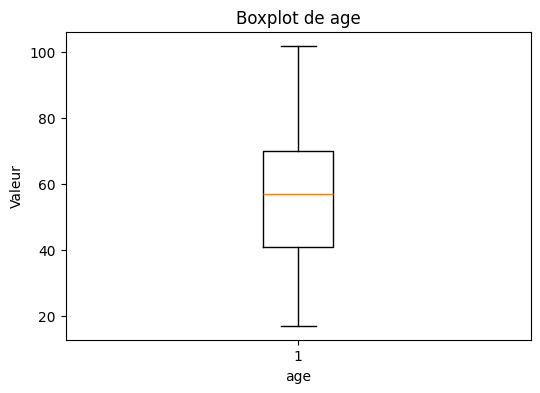

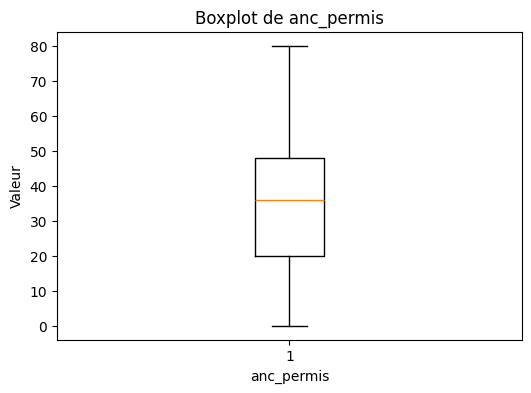

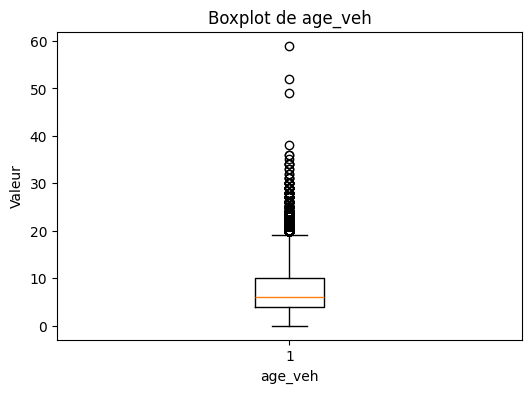

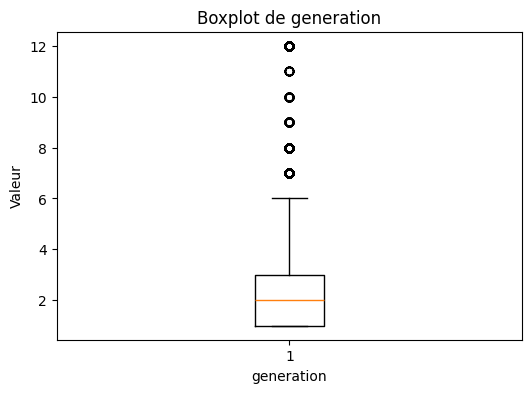

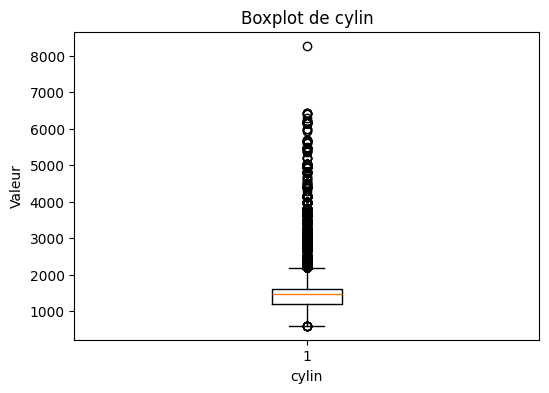

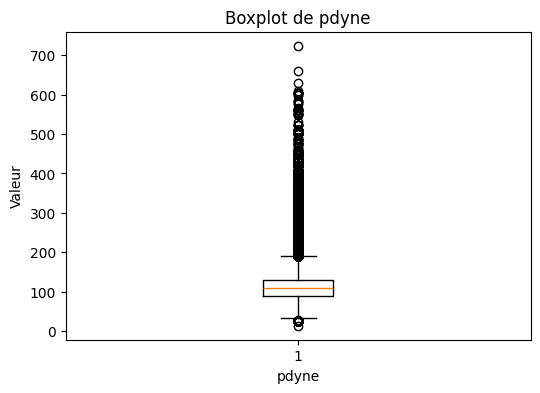

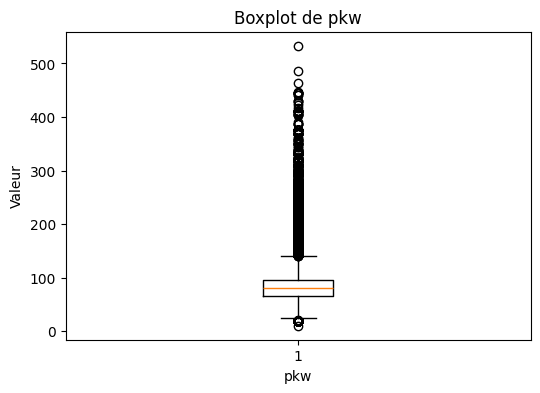

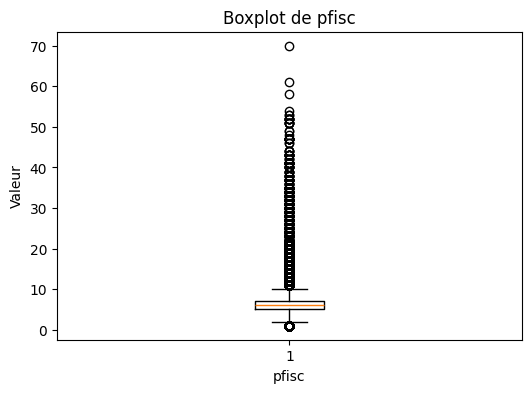

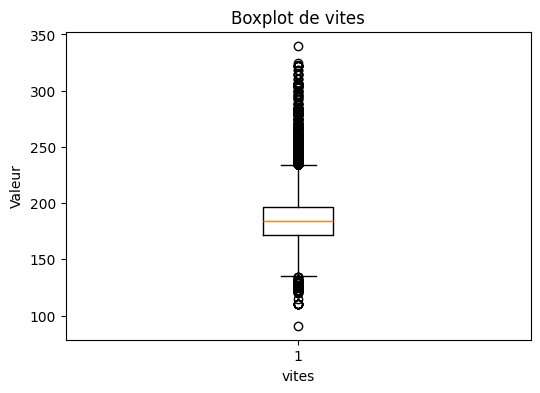

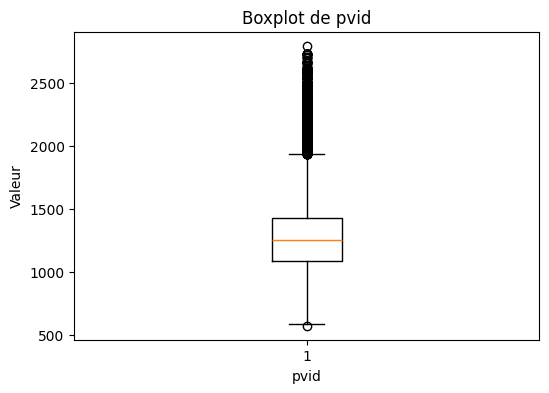

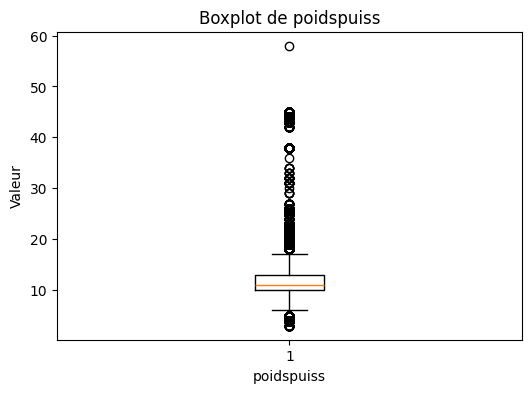

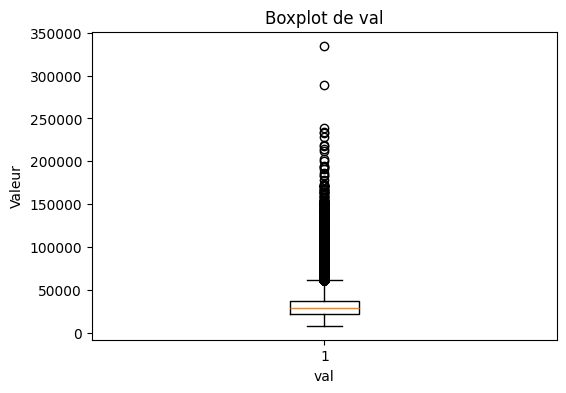

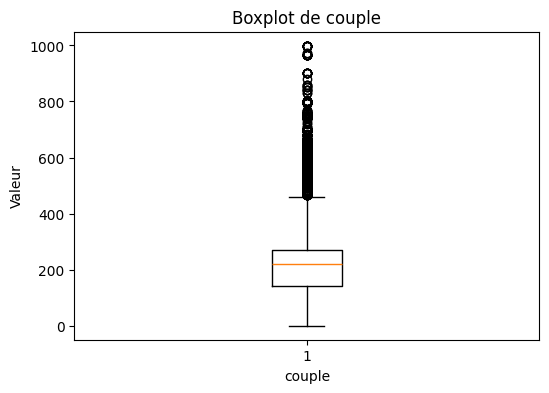

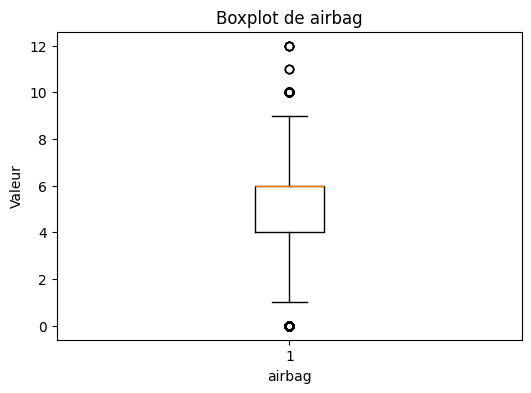

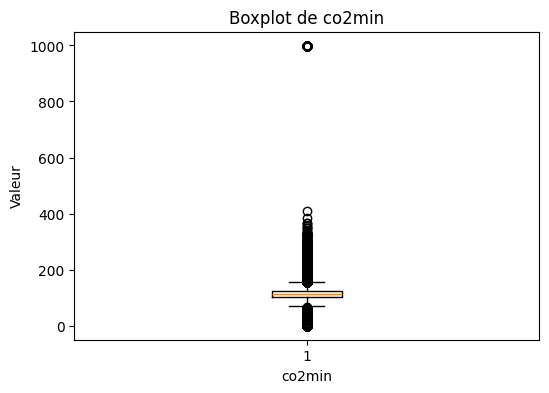

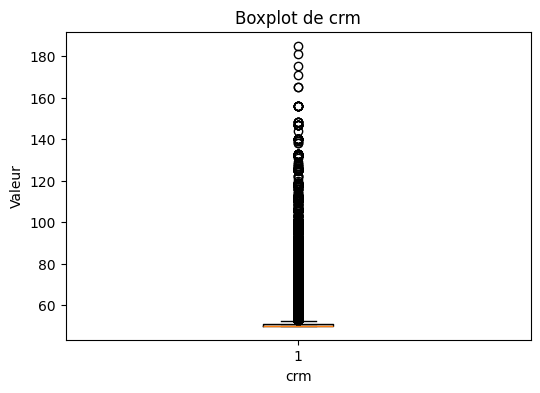

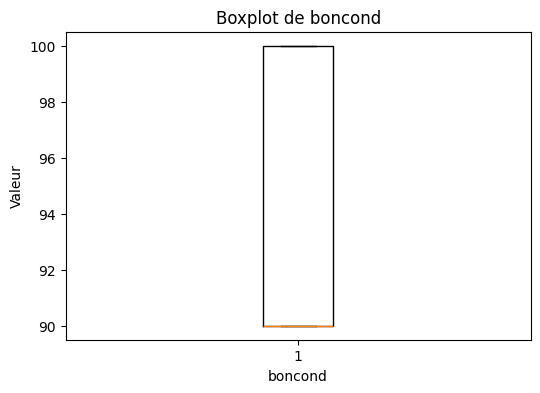

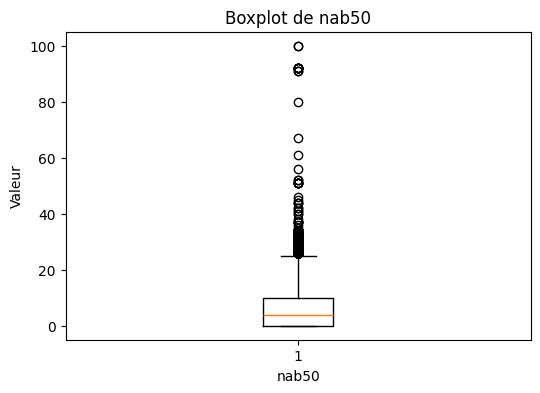

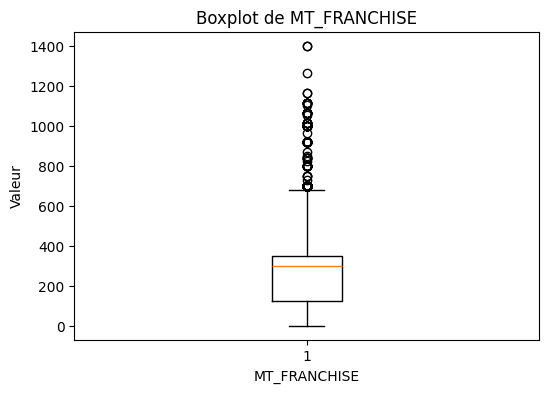

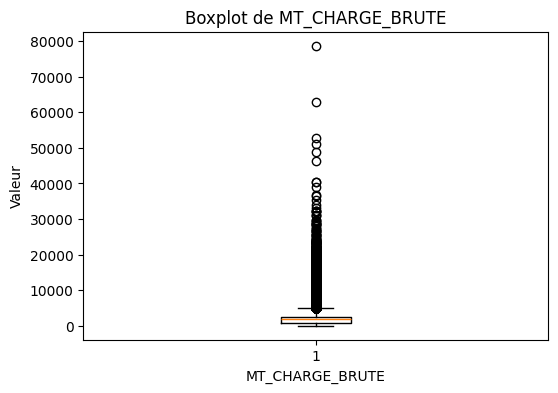

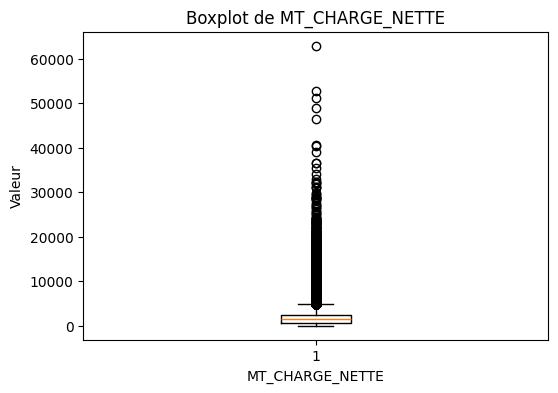

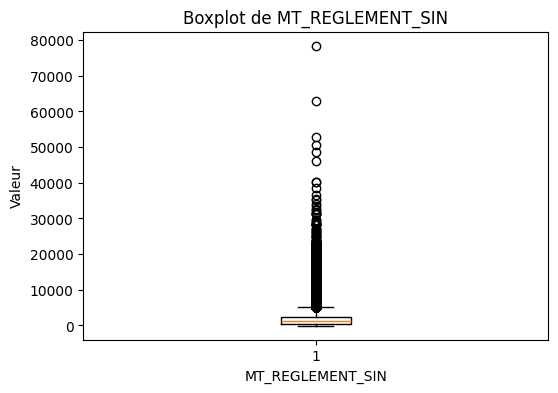

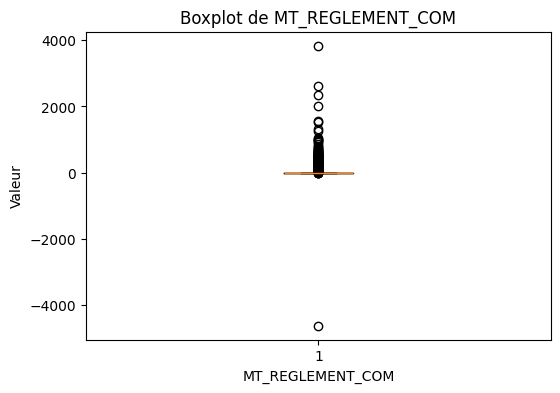

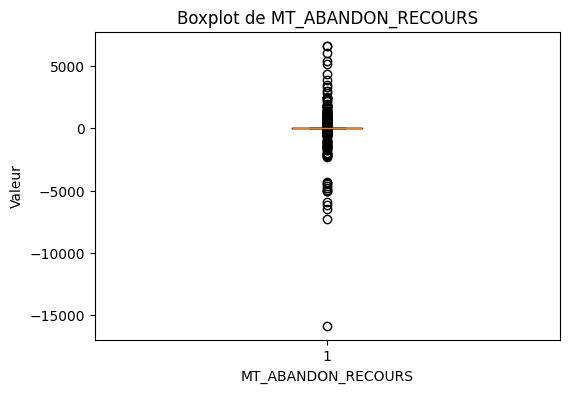

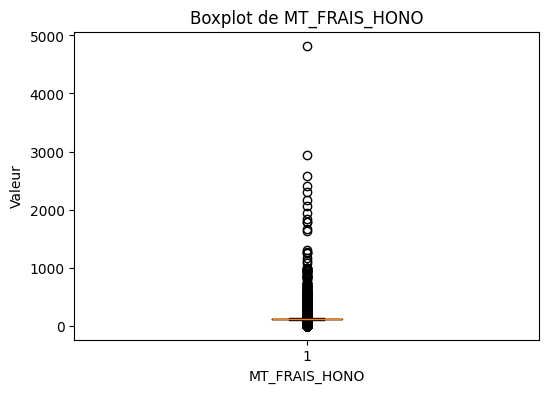

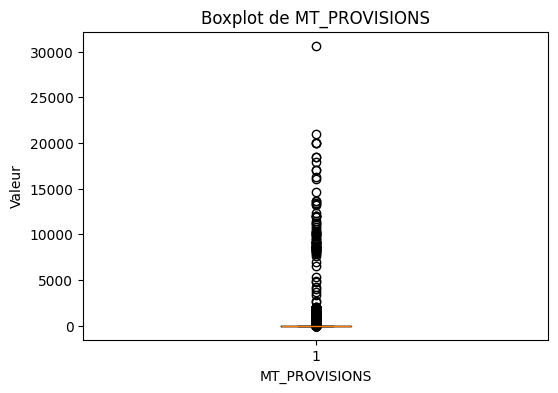

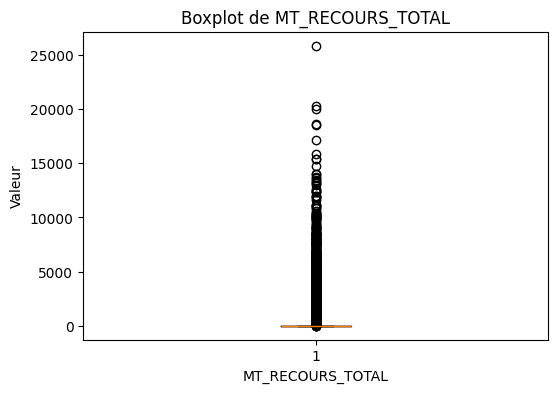

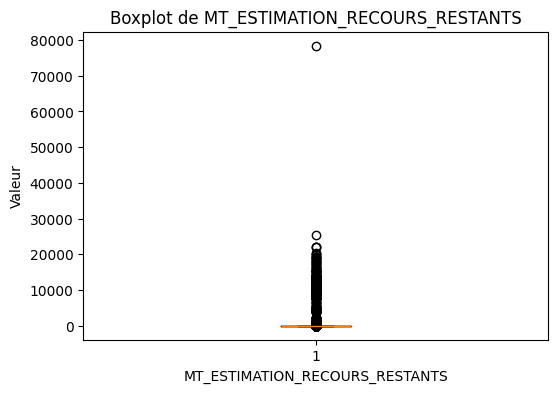

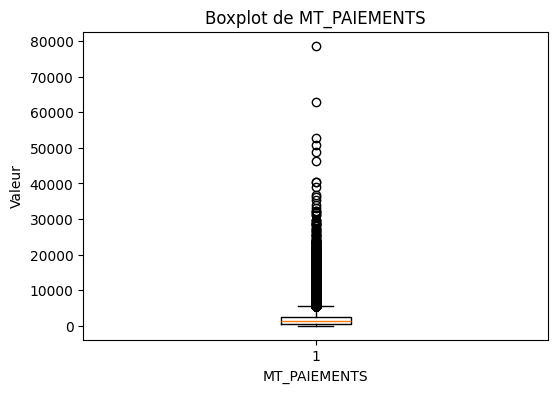

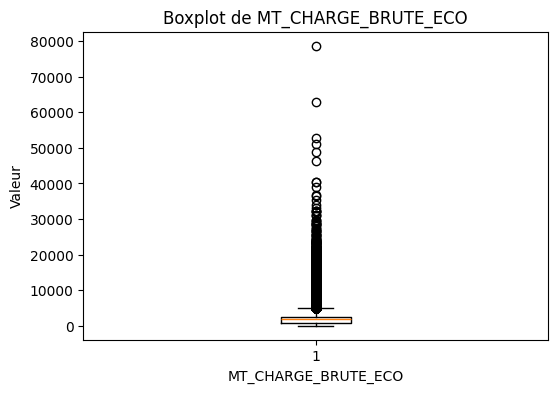

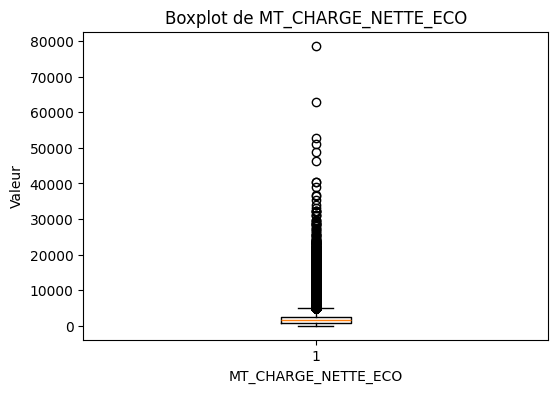

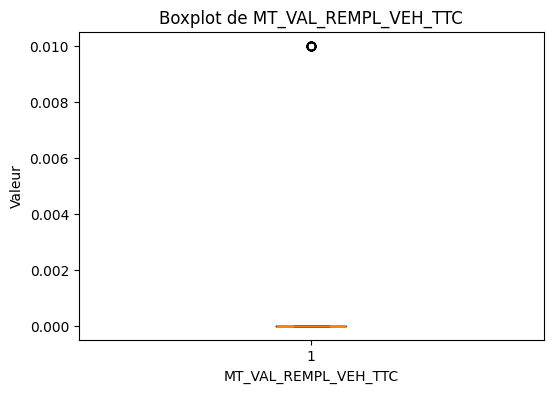

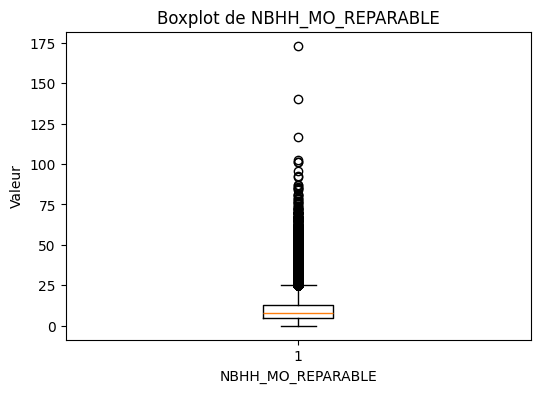

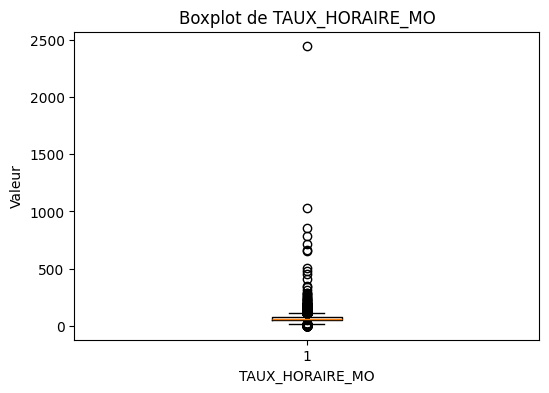

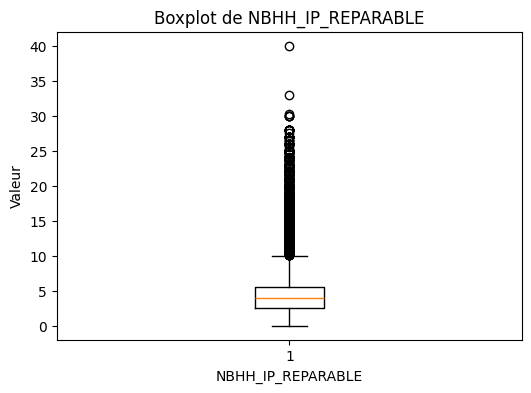

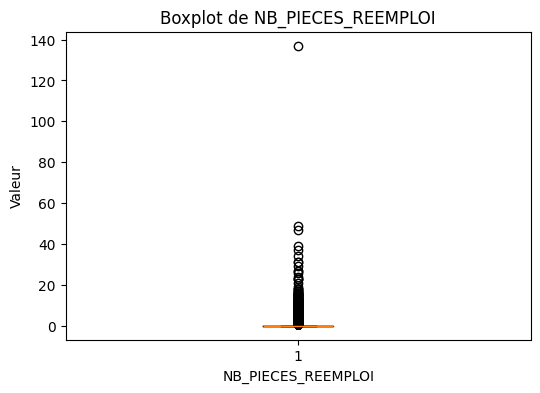

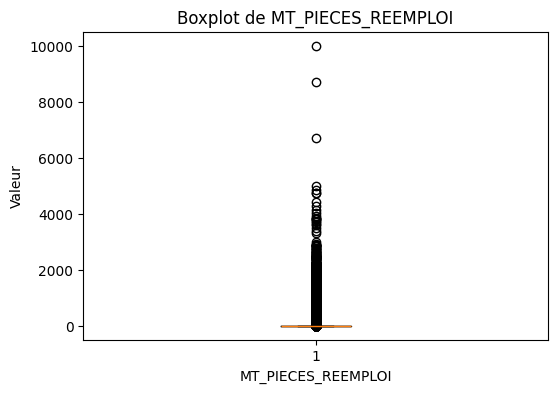

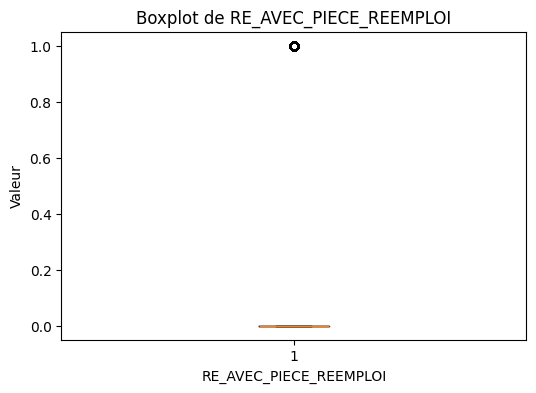

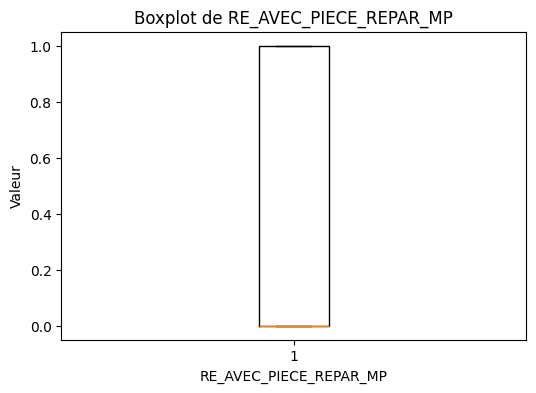

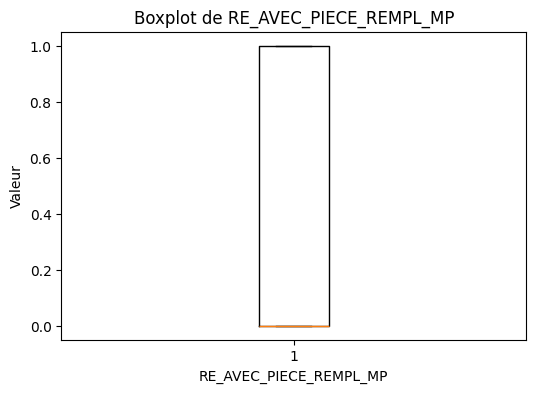

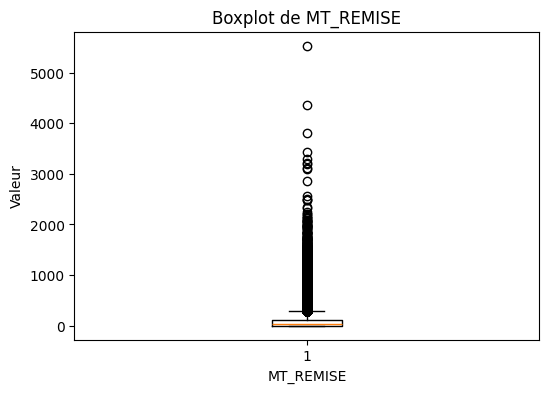

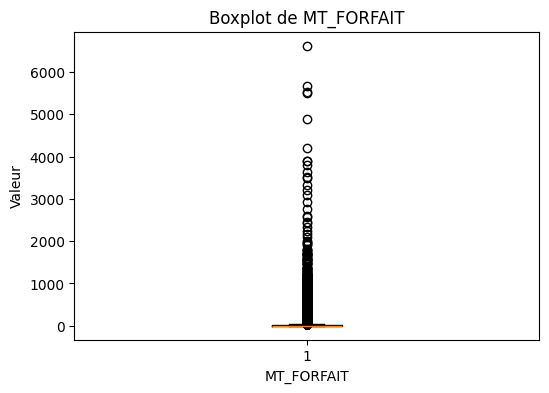

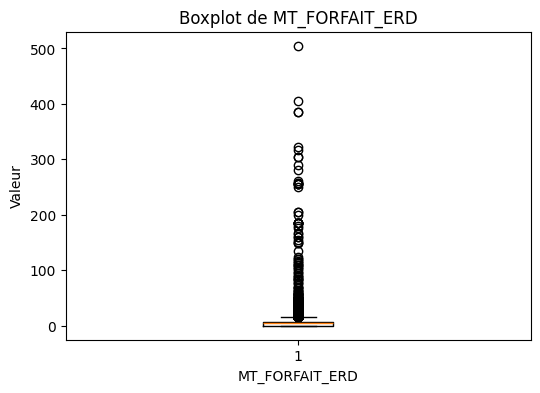

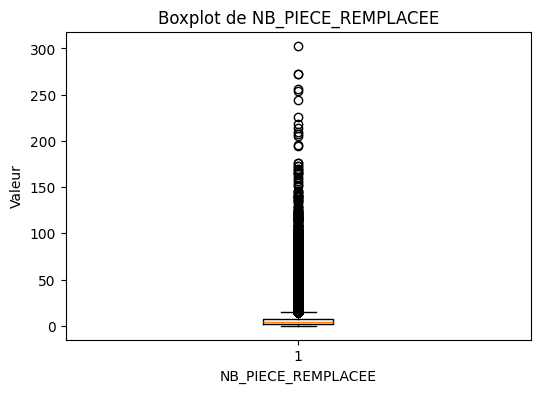

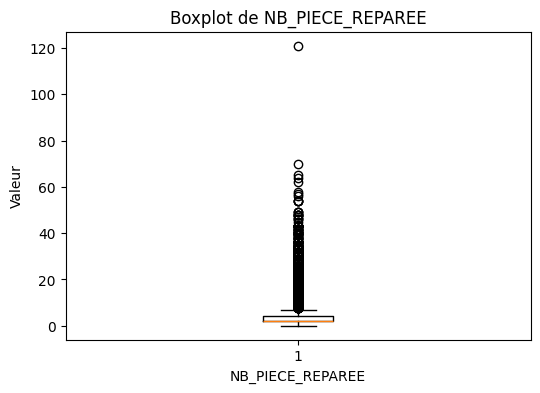

In [1712]:
# Supposons que ton DataFrame s'appelle df et ta liste de variables quant_vars

for var in quanti_vars :
    plt.figure(figsize =(6,4))
    plt.boxplot(data[var].dropna(), whis=1.5)
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.ylabel('Valeur')
    plt.show()


### Stat desc des variavles quantitatives

In [1409]:
for var in quanti_vars :
    print(data[var].describe())

count    183290.000000
mean         55.854586
std          17.832538
min          17.000000
25%          41.000000
50%          57.000000
75%          70.000000
max         102.000000
Name: age, dtype: float64
count    183290.000000
mean         34.353178
std          17.478458
min           0.000000
25%          20.000000
50%          36.000000
75%          48.000000
max          80.000000
Name: anc_permis, dtype: float64
count    183290.000000
mean          7.094544
std           4.436866
min           0.000000
25%           4.000000
50%           6.000000
75%          10.000000
max          59.000000
Name: age_veh, dtype: float64
count    183290.000000
mean          2.411899
std           1.586236
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: generation, dtype: float64
count    183290.000000
mean       1486.458765
std         398.353504
min         599.000000
25%        1199.000000
50%        1461.000000
75% 

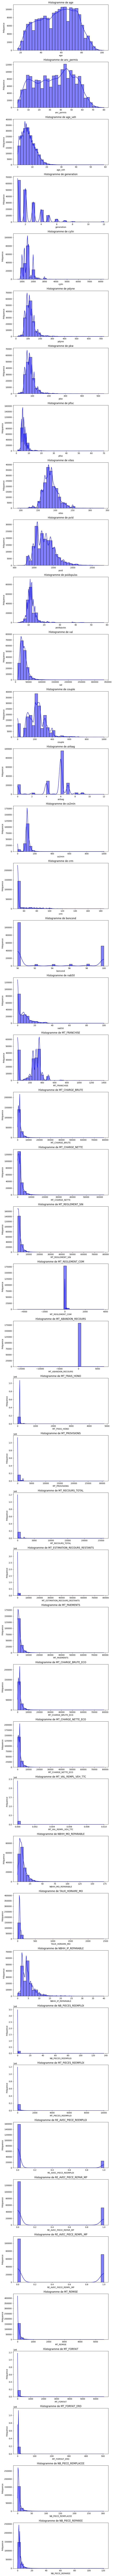

In [1633]:

fig, ax = plt.subplots(len(quanti_vars), 1, figsize=(8, len(quanti_vars) * 4))

# Générer un histogramme pour chaque variable
for i, var in enumerate(quanti_vars):
    sns.histplot(data[var].dropna(), kde=True, bins=30, ax=ax[i], color="blue")

    ax[i].set_title(f"Histogramme de {var}")
    ax[i].set_xlabel(var)
    ax[i].set_ylabel("Fréquence")

plt.tight_layout()
plt.show()


### Pyramide des ages

In [1634]:
# Définition des bornes des groupes d'âge
bins = [18, 25, 35, 45, 55, 65, float('inf')]  
labels = ['[18-25[', '[25-35[', '[35-45[', '[45-55[', '[55-65[', '65+']

# Création de la variable AgeGroup
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Affichage des premières lignes pour vérifier
print(data[['age', 'AgeGroup']].head())

        age AgeGroup
80448  72.0      65+
80449  75.0      65+
80451  70.0      65+
80452  54.0  [45-55[
80453  87.0      65+


C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_27332\544686061.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = data.groupby(['AgeGroup', 'sexe']).size().unstack(fill_value=0)


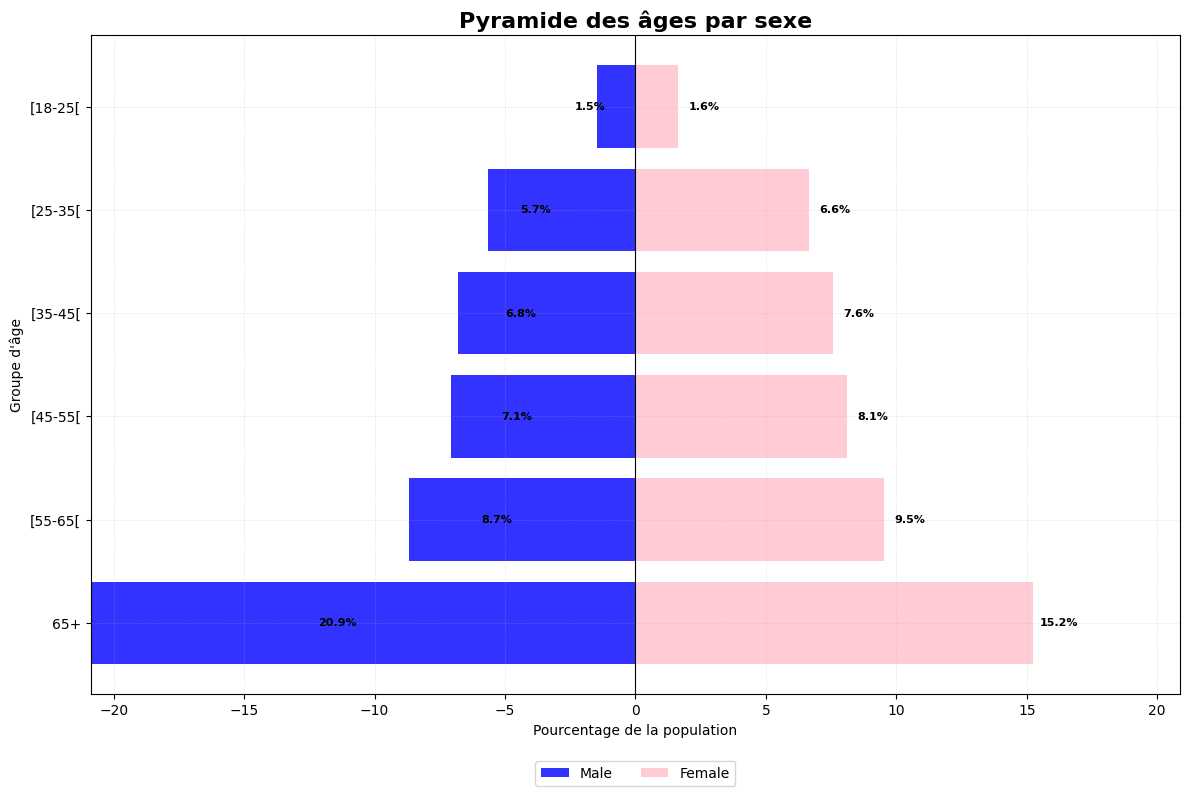

In [1635]:
age_distribution = data.groupby(['AgeGroup', 'sexe']).size().unstack(fill_value=0)

# Calculer les pourcentages
total_population = age_distribution.sum().sum()
age_distribution_percent = (age_distribution / total_population) * 100

# Créer la pyramide des âges
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres pour les hommes (à gauche)
bars_male = ax.barh(age_distribution_percent.index, -age_distribution_percent['M'], color='blue', label='Male', alpha=0.8)

# Tracer les barres pour les femmes (à droite)
bars_female = ax.barh(age_distribution_percent.index, age_distribution_percent['F'], color='pink', label='Female', alpha=0.8)

# Ajouter des grilles
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

# Personnaliser les axes
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.8)
ax.set_xlim(-age_distribution_percent.values.max().max(), age_distribution_percent.values.max().max())

# Ajouter des étiquettes et un titre
ax.set_xlabel('Pourcentage de la population')
ax.set_ylabel('Groupe d\'âge')
ax.set_title('Pyramide des âges par sexe', fontsize=16, fontweight='bold')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Ajouter les pourcentages au milieu des barres
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1 if width > 0 else width/2 - 1, bar.get_y() + bar.get_height()/2, 
                f'{abs(width):.1f}%', ha='center', va='center', 
                fontsize=8, fontweight='bold', color='black')

add_labels(bars_male)
add_labels(bars_female)

# Inverser l'axe y pour avoir les plus jeunes en bas
ax.invert_yaxis()

# Ajuster la mise en page
plt.tight_layout()

# Afficher la pyramide des âges
plt.show()



### Analyse des corrélations entre variables quantitatives

In [55]:
quanti_vars

['age',
 'anc_permis',
 'age_veh',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'co2min',
 'crm',
 'boncond',
 'nab50',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_CHARGE_NETTE',
 'MT_REGLEMENT_SIN',
 'MT_REGLEMENT_COM',
 'MT_ABANDON_RECOURS',
 'MT_FRAIS_HONO',
 'MT_PROVISIONS',
 'MT_RECOURS_TOTAL',
 'MT_ESTIMATION_RECOURS_RESTANTS',
 'MT_PAIEMENTS',
 'MT_CHARGE_BRUTE_ECO',
 'MT_CHARGE_NETTE_ECO',
 'MT_VAL_REMPL_VEH_TTC',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'NBHH_IP_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'MT_REMISE',
 'MT_FORFAIT',
 'MT_FORFAIT_ERD',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE']

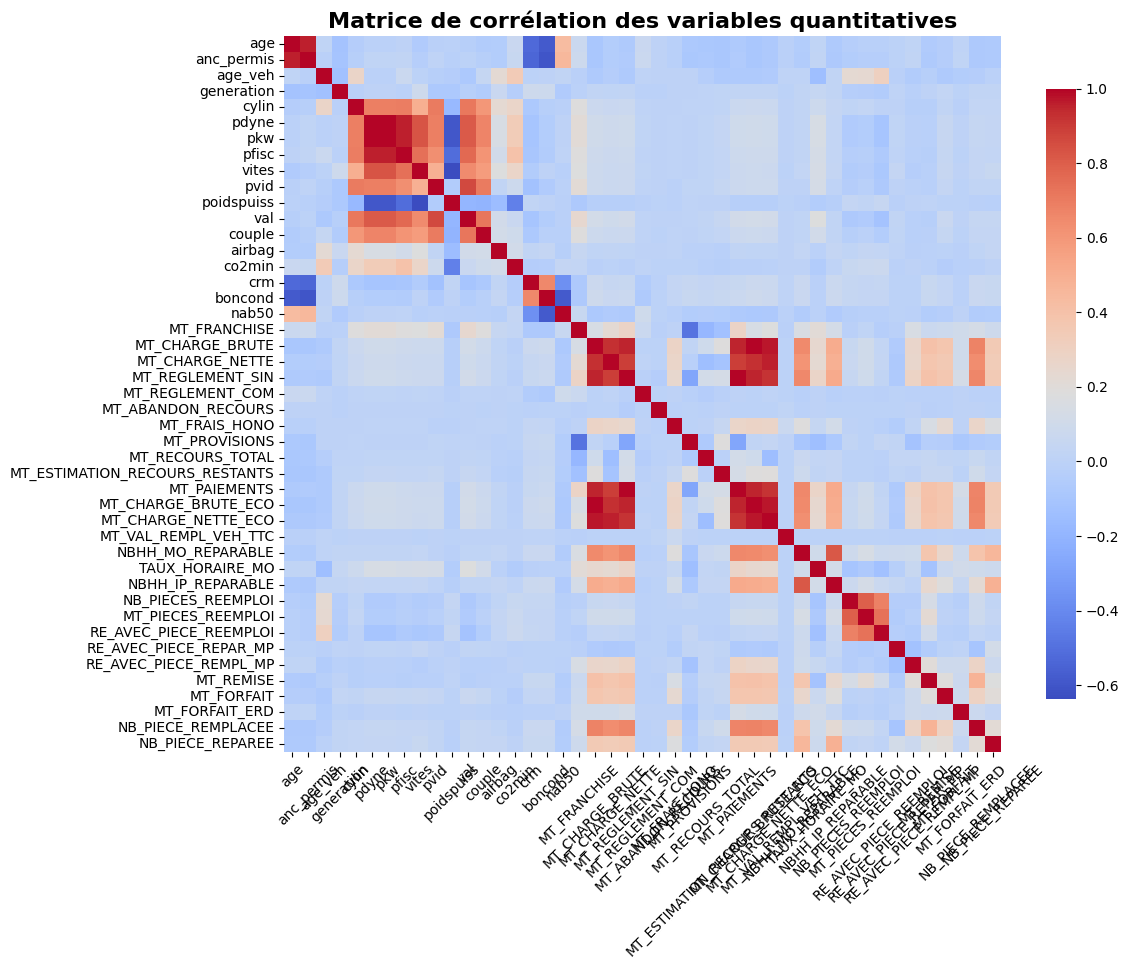

In [1714]:
corr_matrix = data[quanti_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation des variables quantitatives', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [1638]:
# Calculer la matrice de corrélation
corr_matrix = data[quanti_vars].corr()

# Sélectionner les paires de variables avec |corr| >= 0.5
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Supprimer les auto-corrélations (corrélation d'une variable avec elle-même)
corr_pairs = corr_pairs[corr_pairs < 1]

# Filtrer les valeurs supérieures ou égales à 0.5
strong_corr_pairs = corr_pairs[corr_pairs >= 0.5]

# Affichage des résultats
print(strong_corr_pairs)


pkw                     pdyne                     0.999969
pdyne                   pkw                       0.999969
MT_REGLEMENT_SIN        MT_PAIEMENTS              0.998738
MT_PAIEMENTS            MT_REGLEMENT_SIN          0.998738
MT_CHARGE_NETTE_ECO     MT_CHARGE_BRUTE_ECO       0.969156
                        MT_CHARGE_BRUTE           0.969156
MT_CHARGE_BRUTE_ECO     MT_CHARGE_NETTE_ECO       0.969156
MT_CHARGE_BRUTE         MT_CHARGE_NETTE_ECO       0.969156
anc_permis              age                       0.959106
age                     anc_permis                0.959106
pdyne                   pfisc                     0.957752
pfisc                   pdyne                     0.957752
                        pkw                       0.957638
pkw                     pfisc                     0.957638
MT_CHARGE_NETTE         MT_CHARGE_NETTE_ECO       0.955457
MT_CHARGE_NETTE_ECO     MT_CHARGE_NETTE           0.955457
MT_CHARGE_BRUTE_ECO     MT_PAIEMENTS              0.9536

### Sélection des variables
pkw, anc_permis, val, crm, nab50, cylin, podspuiss
NBHH_MO_REPARABLE, NBHH_IP_REPARABLE, TAUX_HORAIRE_MO, 
NB_PIECES_REEMPLOI, NB_PIECE_REPAREE, NB_PIECE_REMPLACEE, RE_AVEC_PIECE_REEMPLOI
MT_TOTAL_REPARABLE, MT_MO_REPARABLE, MT_IP_REPARABLE, MT_PIECES_REPARABLE

### Variable ajoutée
generation, airbag, CO2min, MT_Franchise,age_veh


In [1639]:
quanti_vars

['age',
 'anc_permis',
 'age_veh',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'co2min',
 'crm',
 'boncond',
 'nab50',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_CHARGE_NETTE',
 'MT_REGLEMENT_SIN',
 'MT_REGLEMENT_COM',
 'MT_ABANDON_RECOURS',
 'MT_FRAIS_HONO',
 'MT_PROVISIONS',
 'MT_RECOURS_TOTAL',
 'MT_ESTIMATION_RECOURS_RESTANTS',
 'MT_PAIEMENTS',
 'MT_CHARGE_BRUTE_ECO',
 'MT_CHARGE_NETTE_ECO',
 'MT_VAL_REMPL_VEH_TTC',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'NBHH_IP_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'MT_REMISE',
 'MT_FORFAIT',
 'MT_FORFAIT_ERD',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE']

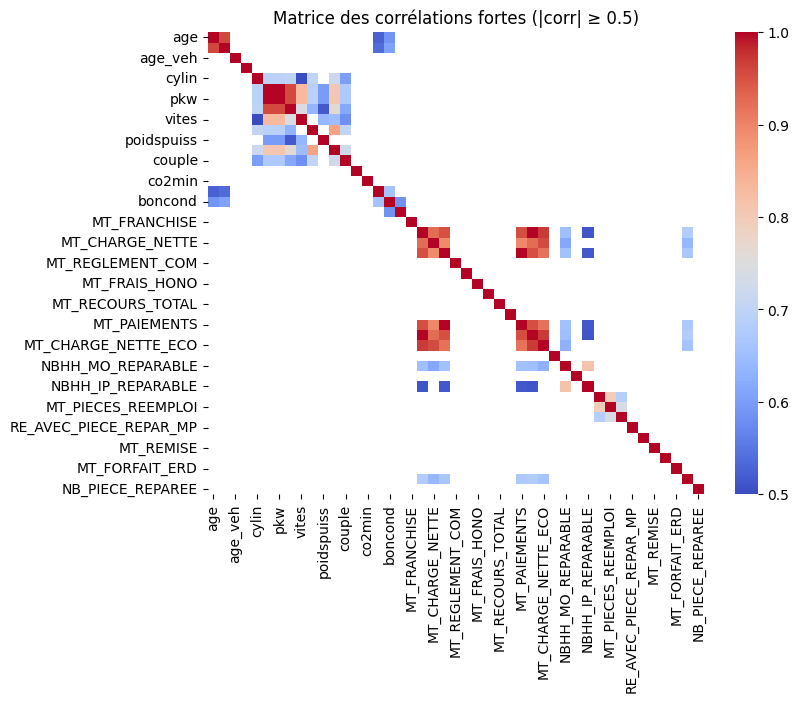

In [1640]:
# Calculer la matrice de corrélation
corr_matrix = data[quanti_vars].corr().abs()

# Filtrer uniquement les corrélations ≥ 0.5
strong_corr = corr_matrix[corr_matrix >= 0.5]

# Supprimer les valeurs NaN pour ne garder que les bonnes corrélations
mask = strong_corr.isna()

# Afficher le heatmap des fortes corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(strong_corr, annot=False, cmap="coolwarm", mask=mask, vmin=0.5, vmax=1)

plt.title("Matrice des corrélations fortes (|corr| ≥ 0.5)")
plt.show()

### Ananlyse des corrélations entre variables qualitatives

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_27332\186094722.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.022817768702533894' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_27332\186094722.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.011047012026425102' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_27332\186094722.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014375097225100745' ha

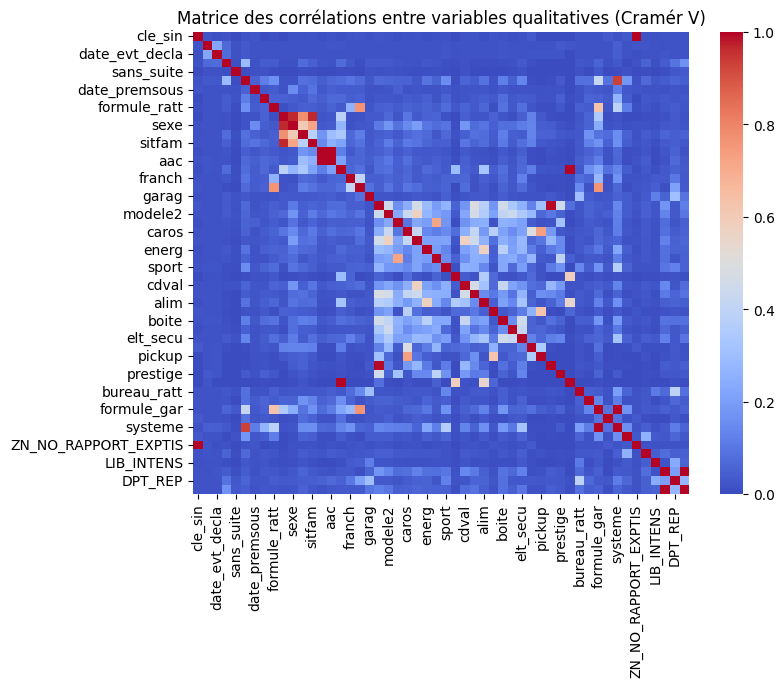

In [1641]:

import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction optimisée pour calculer Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))


# Réduire le nombre de catégories uniques
for var in quali_vars:
    top_categories = data[var].value_counts().index[:50]  # Garder les 50 catégories les plus fréquentes
    data[var] = data[var].apply(lambda x: x if x in top_categories else "Autre")

# Calculer la matrice de corrélation Cramér V avec optimisation mémoire
cramer_matrix = pd.DataFrame(index=quali_vars, columns=quali_vars, dtype=np.float32)

for var1 in quali_vars:
    for var2 in quali_vars:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])

# Affichage du heatmap des corrélations qualitatives
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_matrix, annot=False, cmap="coolwarm", vmin=0, vmax=1)

plt.title("Matrice des corrélations entre variables qualitatives (Cramér V)")
plt.show()

In [1642]:
# Code pour filtrer les corrélations fortes (≥ 0.4)
import pandas as pd
import numpy as np
import scipy.stats as ss

# Fonction pour calculer le coefficient de Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Table de contingence
    chi2 = ss.chi2_contingency(contingency_table)[0]  # Calcul du Chi²
    n = contingency_table.sum().sum()  # Nombre total d'observations
    k = min(contingency_table.shape)  # Taille minimale de la table
    return np.sqrt(chi2 / (n * (k - 1)))  # Formule de Cramér V


# Calculer la matrice de corrélation Cramér V
cramer_matrix = pd.DataFrame(index=quali_vars, columns=quali_vars, dtype=np.float32)

for var1 in quali_vars:
    for var2 in quali_vars:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1  # Corrélation parfaite avec soi-même
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])

# Convertir en float pour l'affichage
cramer_matrix = cramer_matrix.astype(float)

# 🔍 Extraire les paires avec Cramér V ≥ 0.4
corr_pairs = cramer_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Supprimer les auto-corrélations
strong_corr_pairs = corr_pairs[corr_pairs >= 0.4]  # Filtrer les valeurs fortes

# Affichage des résultats
print("🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :")
print(strong_corr_pairs)


C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_27332\417216960.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.022817768702533894' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_27332\417216960.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.011047012026425102' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_27332\417216960.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014375097225100745' ha

🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :
usage2          soumis_crm        1.000000
soumis_crm      usage2            1.000000
aac             orig_attest       0.999147
orig_attest     aac               0.999147
formule_gar     systeme           0.996872
systeme         formule_gar       0.996872
luxe            marq              0.994389
marq            luxe              0.994389
sexe            cond_indet        0.966267
cond_indet      sexe              0.966267
sitfam          cond_indet        0.966267
cond_indet      sitfam            0.966267
systeme         quart_resp        0.933344
quart_resp      systeme           0.933344
cond_indet      profess           0.776716
profess         cond_indet        0.776716
formule_gar     rachat_francBG    0.764513
rachat_francBG  formule_gar       0.764513
                formule_ratt      0.762828
formule_ratt    rachat_francBG    0.762828
pickup          caros             0.733406
caros           pickup            0.7334

In [1643]:
quali_vars

['cle_sin',
 'date_evt',
 'date_evt_decla',
 'clos',
 'sans_suite',
 'quart_resp',
 'date_premsous',
 'date_dernrempl',
 'formule_ratt',
 'cond_indet',
 'sexe',
 'profess',
 'sitfam',
 'orig_attest',
 'aac',
 'usage2',
 'franch',
 'rachat_francBG',
 'garag',
 'marq',
 'modele2',
 'modele_desc',
 'caros',
 'segment',
 'energ',
 'num_sra',
 'sport',
 'frein',
 'cdval',
 'trans',
 'alim',
 'suspe',
 'boite',
 'crash',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'bureau_ratt',
 'fract_paiem_soc',
 'formule_gar',
 'petit_rouleur',
 'systeme',
 'GARANTIE_HOST',
 'ZN_NO_RAPPORT_EXPTIS',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'DPT_REP',
 '_RESEAU_']

Sélection des variables

soumis_crm, aac, formule_gar, marq, sexe, sitfam, quart_resp, profess, (caros/pickup), (modele_desc/num_sra), (suspe/pickup), alim
cdval, modele2, crash, boite


#Variable non correlée

'cle_sin','date_evt' (est ce encore nécessaire de prendre date_evt_decla ? ), 'fract_paiem_soc', LIB_CHOC, LIB_INYENS

#### Variable ajoutée
date_premsous

### Quelques stat des variables qualitatites

In [56]:
new_qual_var = ["soumis_crm", "aac", "sexe", "sitfam", "quart_resp", "suspe", "alim", "crash", "boite", "fract_paiem_soc", "LIB_CHOC", "LIB_INTENS"]


In [57]:
new_qual_vars = ["soumis_crm", "aac", "sexe", "profess", "marq", "modele2", "sitfam", "quart_resp", "suspe", "alim",
"cdval", "crash", "boite", "fract_paiem_soc", "LIB_CHOC", "LIB_INTENS"]

qualitative_summary = {}

for var in new_qual_vars:
    counts = data[var].value_counts(dropna=False)
    percentages = data[var].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Pourcentage (%)': percentages.round(2)})
    qualitative_summary[var] = summary

for var in new_qual_vars:
    # Exemple d'affichage pour une variable (par ex: Risque)
    print("\n--- Fréquences pour ", var)
    print(qualitative_summary[var])



--- Fréquences pour  soumis_crm
            Pourcentage (%)
soumis_crm                 
O                     100.0
N                       0.0

--- Fréquences pour  aac
     Pourcentage (%)
aac                 
N              91.62
O               8.38

--- Fréquences pour  sexe
      Pourcentage (%)
sexe                 
M               50.56
F               48.68
I                0.76

--- Fréquences pour  profess
         Pourcentage (%)
profess                 
09                 23.73
04                 20.94
01                 19.55
00                  5.50
02                  4.82
06                  4.14
03                  3.83
X2                  3.67
99                  2.23
XB                  2.19
05                  1.40
X7                  1.28
95                  1.04
50                  0.92
X9                  0.60
07                  0.59
X3                  0.49
I                   0.49
X6                  0.43
XA                  0.41
10                  0.31
80 

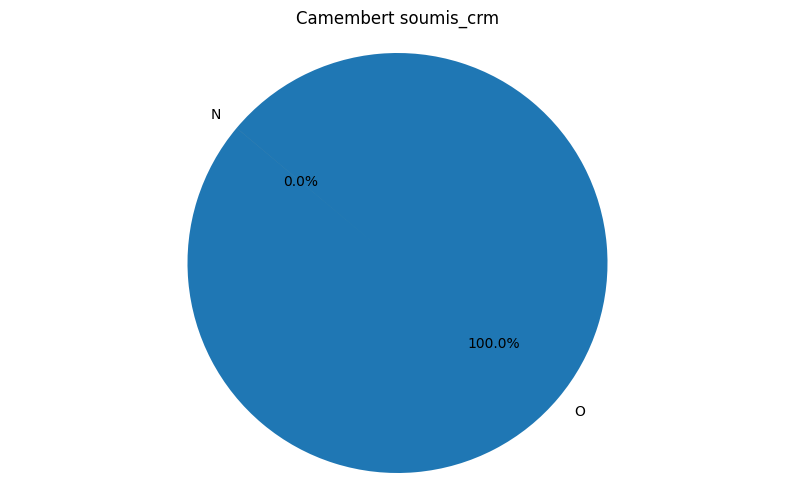

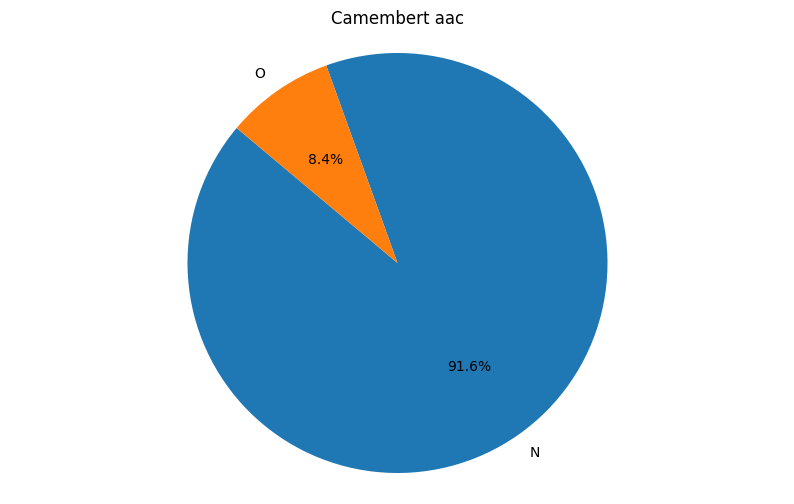

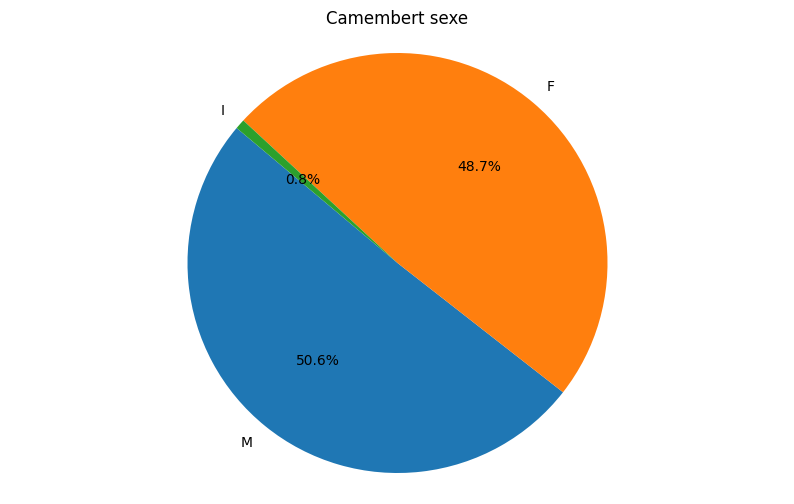

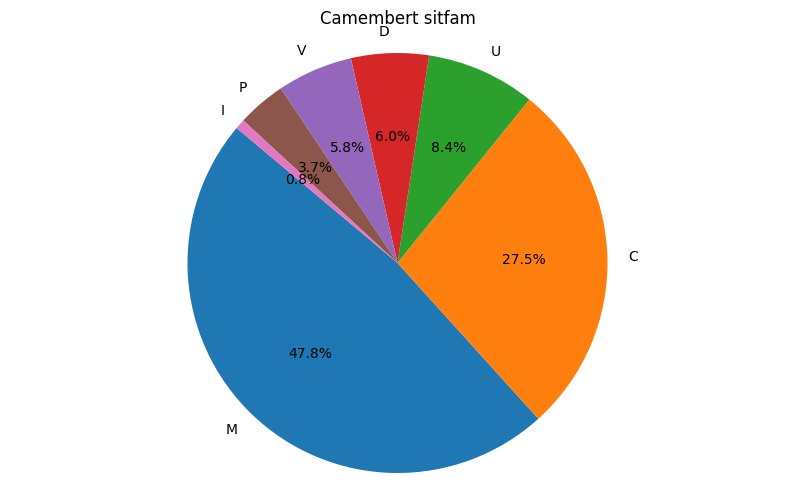

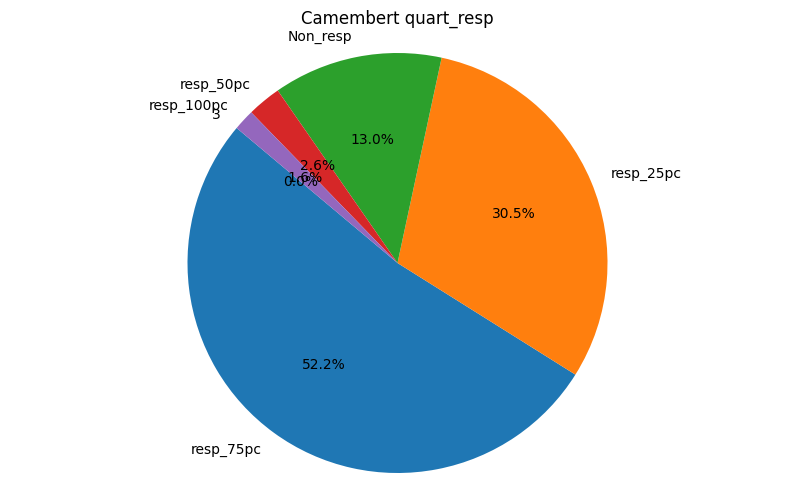

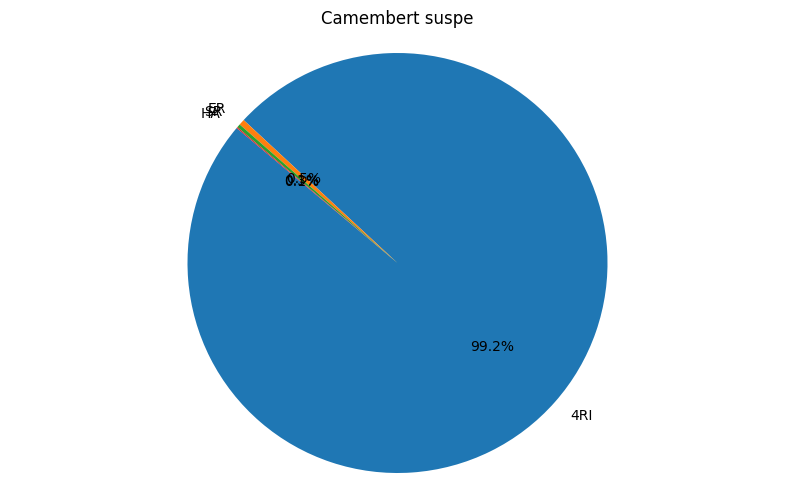

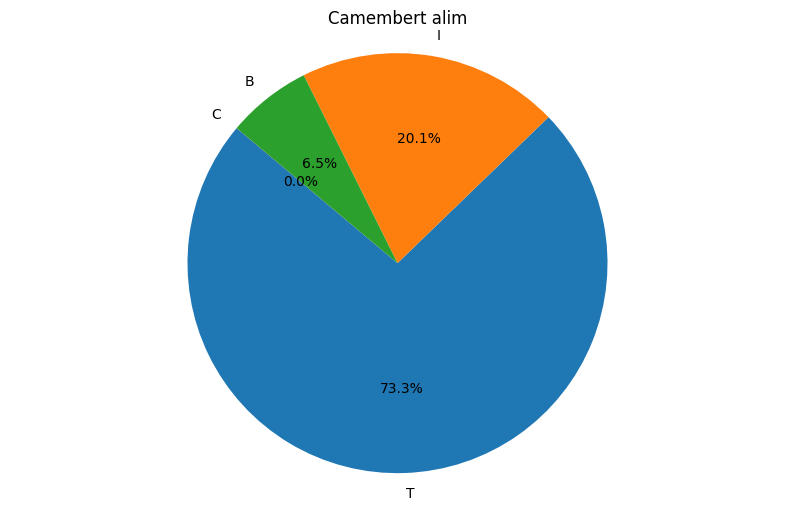

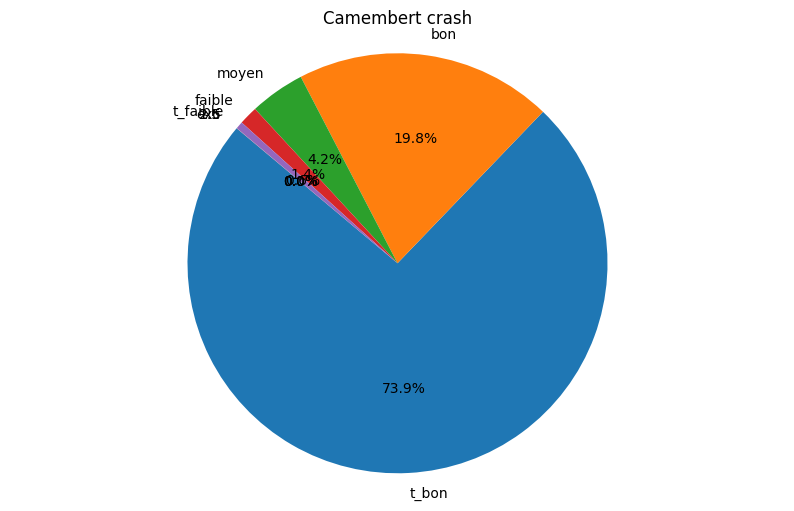

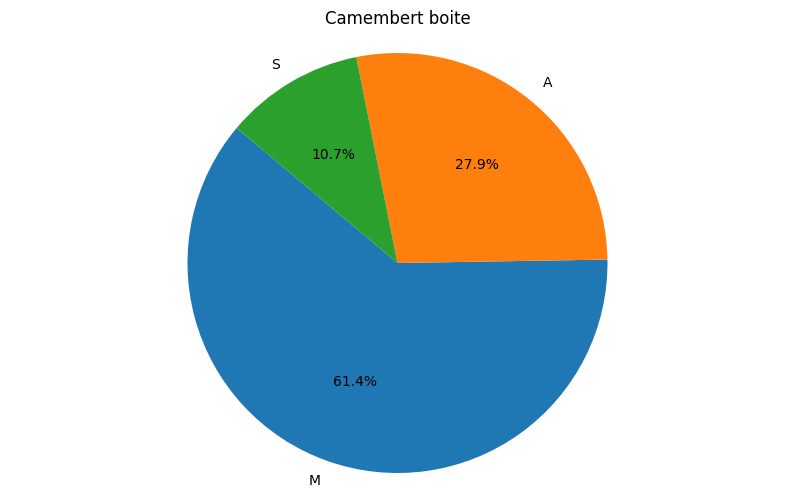

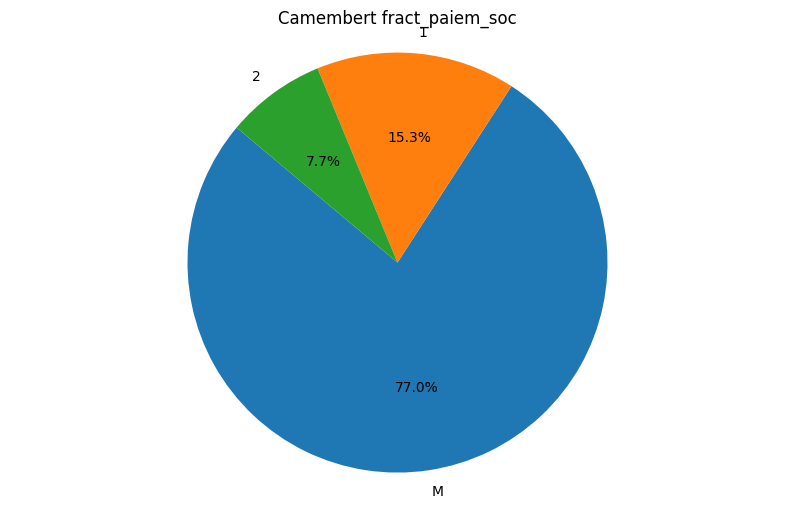

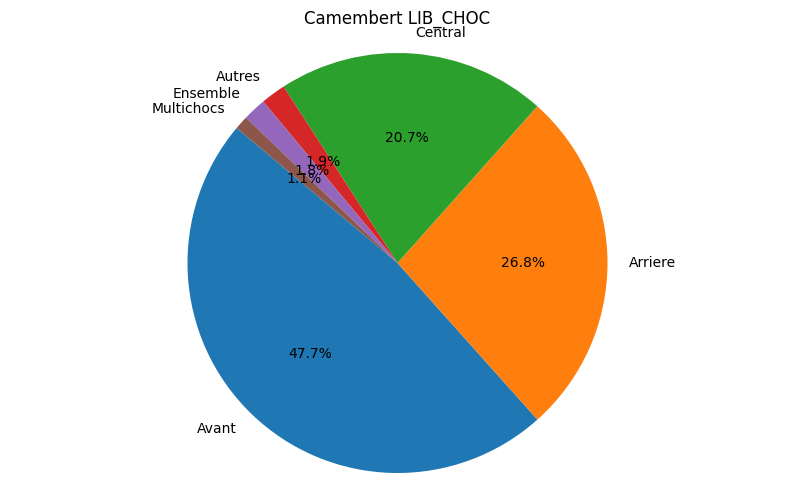

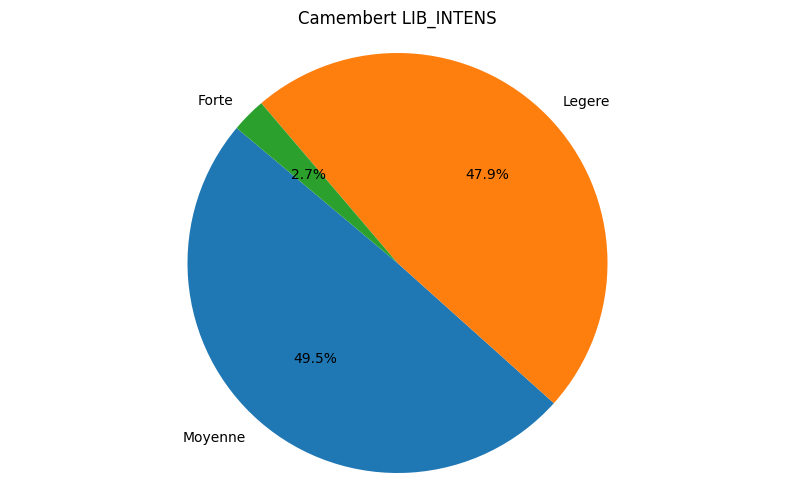

In [1646]:
for var in new_qual_var:
    counts= data[var].value_counts(dropna=False)
    labels = counts.index.astype(str)
    sizes = counts.values
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Camembert {var}')
    plt.axis('equal')  # Pour que le camembert soit un cercle
    plt.show()


Finalement, on garde 

- Comme variable qualitatives : 

"aac", "sexe", "profess", "marq", "modele2", "sitfam", "quart_resp", "suspe", "alim",
"cdval", "crash", "boite", "fract_paiem_soc", "LIB_CHOC", "LIB_INTENS", "date_premsous"

- Comme variable quantitatives : 

pkw, anc_permis, val, crm, nab50, vites,
generation, airbag, CO2min, MT_Franchise,
NB_PIECE_REMPLACEE, NB_PICES_REEMPLOI, NB_PIECE_REPAREE



In [1655]:
data.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,MT_FORFAIT,MT_FORFAIT_ERD,LIB_CHOC,LIB_INTENS,GARAGE_AGREE_O_N,DPT_REP,_RESEAU_,NB_PIECE_REMPLACEE,NB_PIECE_REPAREE,AgeGroup
80448,241840204C A 001,2024-01-02,Autre,O,N,resp_75pc,NaT,Autre,PRO,N,...,32.5,0.0,Avant,Moyenne,N,44,Non agréé,3.0,3.0,65+
80449,241840598C A 001,NaT,Autre,O,N,resp_75pc,NaT,Autre,PRO,N,...,0.0,3.0,Autres,Legere,N,44,Non agréé,1.0,1.5,65+
80451,241840842C A 006,NaT,Autre,O,N,resp_50pc,NaT,2023-12-31 00:00:00,PRO,N,...,0.0,0.0,Arriere,Moyenne,N,16,Indet,2.0,1.0,65+
80452,241840544C A 002,NaT,Autre,O,N,resp_75pc,NaT,2023-12-31 00:00:00,PRO,N,...,0.0,0.0,Arriere,Legere,N,44,Indet,5.0,1.0,[45-55[
80453,241841770C A 003,2024-01-08,Autre,O,N,resp_75pc,NaT,Autre,EXC,N,...,0.0,0.0,Arriere,Moyenne,O,17,MRA,1.0,3.0,65+


pkw, anc_permis, val, crm, nab50, cylin, podspuiss
NBHH_MO_REPARABLE, NBHH_IP_REPARABLE, TAUX_HORAIRE_MO, 
NB_PIECES_REEMPLOI, NB_PIECE_REPAREE, NB_PIECE_REMPLACEE, RE_AVEC_PIECE_REEMPLOI
MT_TOTAL_REPARABLE, MT_MO_REPARABLE, MT_IP_REPARABLE, MT_PIECES_REPARABLE

### Variable ajoutée
generation, airbag, CO2min, MT_Franchise,

"aac", "sexe", "profess", "marq", "modele2", "sitfam", "quart_resp", "suspe", "alim",
"cdval", "crash", "boite", "fract_paiem_soc", "LIB_CHOC", "LIB_INTENS", "date_premsous"

In [58]:
print(data[data['date_evt'].isna()][['date_evt']])

Empty DataFrame
Columns: [date_evt]
Index: []


In [59]:
print(data[data['date_premsous'].isna()][['date_premsous']])

Empty DataFrame
Columns: [date_premsous]
Index: []


In [60]:
data_copie = data.copy()

In [61]:
data_copie.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,MT_REMISE,MT_FORFAIT,MT_FORFAIT_ERD,LIB_CHOC,LIB_INTENS,GARAGE_AGREE_O_N,DPT_REP,_RESEAU_,NB_PIECE_REMPLACEE,NB_PIECE_REPAREE
80448,241840204C A 001,02/01/2024,02/01/2024,O,N,resp_75pc,30/01/1991,30/04/2020,PRO,N,...,30.43,32.5,0.0,Avant,Moyenne,N,44,Non agréé,3.0,3.0
80449,241840598C A 001,03/01/2024,03/01/2024,O,N,resp_75pc,02/04/1992,12/06/2020,PRO,N,...,0.00,0.0,3.0,Autres,Legere,N,44,Non agréé,1.0,1.5
80451,241840842C A 006,03/01/2024,04/01/2024,O,N,resp_50pc,03/10/2019,2023-12-31 00:00:00,PRO,N,...,0.00,0.0,0.0,Arriere,Moyenne,N,16,Indet,2.0,1.0
80452,241840544C A 002,03/01/2024,03/01/2024,O,N,resp_75pc,07/04/2017,2023-12-31 00:00:00,PRO,N,...,0.00,0.0,0.0,Arriere,Legere,N,44,Indet,5.0,1.0
80453,241841770C A 003,08/01/2024,08/01/2024,O,N,resp_75pc,14/12/1987,17/04/2014,EXC,N,...,0.00,0.0,0.0,Arriere,Moyenne,O,17,MRA,1.0,3.0


In [68]:
data_copie['date_evt'] = pd.to_datetime(data_copie['date_evt'], dayfirst=True, errors='coerce')
data_copie['date_premsous'] = pd.to_datetime(data_copie['date_premsous'], dayfirst=True, errors='coerce')

# Vérification des résultats
print(data_copie[['date_evt', 'date_premsous']].head())

        date_evt date_premsous
80448 2024-01-02    1991-01-30
80449 2024-01-03    1992-04-02
80451 2024-01-03    2019-10-03
80452 2024-01-03    2017-04-07
80453 2024-01-08    1987-12-14


In [69]:
print(data_copie[data_copie['date_premsous'].isna()][['date_premsous']])

Empty DataFrame
Columns: [date_premsous]
Index: []


In [70]:
print(data_copie[data_copie['date_premsous'].isna()][['date_premsous']])

Empty DataFrame
Columns: [date_premsous]
Index: []


In [75]:
selected_columns = [ 'cle_sin', 'date_evt',
    'pkw', 'age_veh', 'val', 'marq', 'modele2', 'generation', 'airbag', 'co2min', 'cdval', 'crash', 'boite', 'anc_permis', 'suspe', 'alim',
       'cylin', 'poidspuiss', 'LIB_CHOC', 'LIB_INTENS', 'crm', 'nab50', 'aac', 'sexe', 'profess',  'sitfam', 'quart_resp',
    'fract_paiem_soc', 'date_premsous',
    'NBHH_MO_REPARABLE', 'NBHH_IP_REPARABLE', 'TAUX_HORAIRE_MO',
    'NB_PIECES_REEMPLOI', 'NB_PIECE_REPAREE', 'NB_PIECE_REMPLACEE', 'RE_AVEC_PIECE_REEMPLOI',
    'MT_TOTAL_REPARABLE', 'MT_MO_REPARABLE', 'MT_IP_REPARABLE', 'MT_PIECES_REPARABLE',
    'MT_FRANCHISE']

# Sélection des colonnes dans le DataFrame
data_final = data[selected_columns]

In [76]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183290 entries, 80448 to 278692
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cle_sin                 183290 non-null  object 
 1   date_evt                183290 non-null  object 
 2   pkw                     183290 non-null  float64
 3   age_veh                 183290 non-null  float64
 4   val                     183290 non-null  float64
 5   marq                    183290 non-null  object 
 6   modele2                 183290 non-null  object 
 7   generation              183290 non-null  float64
 8   airbag                  183290 non-null  float64
 9   co2min                  183290 non-null  float64
 10  cdval                   183290 non-null  object 
 11  crash                   183290 non-null  object 
 12  boite                   183290 non-null  object 
 13  anc_permis              183290 non-null  float64
 14  suspe                

In [67]:
data_final['exposure']= data_final['date_evt'] - data_final['date_premsous']
# Convertir la colonne 'exposure' en jours  
data_final['exposure'] = data_final['exposure'].dt.days
data_final.head()

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\3681903828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['exposure']= data_final['date_evt'] - data_final['date_premsous']
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\3681903828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['exposure'] = data_final['exposure'].dt.days


,cle_sin,date_evt,pkw,anc_permis,val,crm,nab50,cylin,poidspuiss,NBHH_MO_REPARABLE,...,suspe,alim,cdval,crash,boite,fract_paiem_soc,LIB_CHOC,LIB_INTENS,date_premsous,exposure
80448,241840204C A 001,2024-01-02,74.0,53.0,24584.0,50.0,6.0,1199.0,11.0,9.9,...,4RI,T,V07,bon,A,M,Avant,Moyenne,1991-01-30,12025
80449,241840598C A 001,2024-01-03,103.0,36.0,31980.0,50.0,6.0,1332.0,9.0,1.0,...,4RI,T,V10,t_bon,M,2,Autres,Legere,1992-04-02,11598
80451,241840842C A 006,2024-01-03,103.0,48.0,35726.0,50.0,8.0,1968.0,11.0,2.0,...,4RI,T,V12,t_bon,M,M,Arriere,Moyenne,2019-10-03,1553
80452,241840544C A 002,2024-01-03,50.0,33.0,13464.0,72.0,0.0,998.0,12.0,6.5,...,4RI,I,V03,bon,M,M,Arriere,Legere,2017-04-07,2462
80453,241841770C A 003,2024-01-08,62.5,65.0,17640.0,50.0,5.0,1248.0,11.0,10.1,...,4RI,I,V05,t_bon,M,M,Arriere,Moyenne,1987-12-14,13174


In [71]:
data_final_filtered = data_final[data_final['exposure'] <= 0][['date_evt', 'date_premsous', 'exposure']]

data_final_filtered

,date_evt,date_premsous,exposure
81528,2024-02-15,2024-02-15,0
81887,2024-03-09,2024-03-09,0
82051,2024-01-22,2024-01-22,0
84801,2024-02-22,2024-02-22,0
85197,2024-04-25,2024-04-25,0
85771,2024-05-28,2024-05-28,0
86092,2024-05-13,2024-05-13,0
86251,2024-04-17,2024-04-17,0
86494,2024-03-11,2024-03-11,0
89169,2024-07-05,2024-07-05,0


In [1732]:
# Calcul du log de l'exposition
data_final['log_exposure'] = np.log(data_final['exposure'])

# Affichage pour vérifier le résultat
print(data_final[['exposure', 'log_exposure']].head())


       exposure  log_exposure
80448     12025      9.394743
80449     11598      9.358588
80451      1553      7.347944
80452      2462      7.808729
80453     13174      9.486000


c:\Users\esthelle.kuissu\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\esthelle.kuissu\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_27332\1376498414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['log_exposure'] = np.log(data_final['exposure'])


In [77]:
data_final.drop(columns=['date_evt', 'date_premsous'], inplace=True)

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_18424\2629321214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.drop(columns=['date_evt', 'date_premsous'], inplace=True)


In [1737]:
data_final['exposure'].describe()

count    183290.000000
mean       4441.962491
std        4196.765603
min          -4.000000
25%         963.000000
50%        2690.000000
75%        7379.000000
max       18304.000000
Name: exposure, dtype: float64

In [1736]:
print(data_final[data_final['log_exposure'].isna()][['log_exposure']])

        log_exposure
158158           NaN


In [79]:
#sauvegarde de la base sous format csv
data_final.to_csv(path + "\\new_bdd_sinistres_rapports_2024_final.csv", sep=";", encoding="latin1", index=False)
# Afficher les premières lignes de la base finale
data_final.head()
# Afficher les informations de la base finale
data_final.info()
# Afficher les valeurs manquantes dans la base finale
pd.set_option('display.max_rows', None)
manquantes_final = data_final.isnull().sum()
print(manquantes_final[manquantes_final > 0].sort_values(ascending=False))
# Afficher le pourcentage de valeurs manquantes dans la base finale
manquantes_final_pc = (data_final.isnull().sum()/len(data_final)) * 100
print(manquantes_final_pc[manquantes_final_pc > 0].sort_values(ascending=False))
# Afficher les colonnes de la base finale
print(list(data_final.columns))

<class 'pandas.core.frame.DataFrame'>
Index: 183290 entries, 80448 to 278692
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cle_sin                 183290 non-null  object 
 1   pkw                     183290 non-null  float64
 2   age_veh                 183290 non-null  float64
 3   val                     183290 non-null  float64
 4   marq                    183290 non-null  object 
 5   modele2                 183290 non-null  object 
 6   generation              183290 non-null  float64
 7   airbag                  183290 non-null  float64
 8   co2min                  183290 non-null  float64
 9   cdval                   183290 non-null  object 
 10  crash                   183290 non-null  object 
 11  boite                   183290 non-null  object 
 12  anc_permis              183290 non-null  float64
 13  suspe                   183290 non-null  object 
 14  alim                 